In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from umi_tools import UMIClusterer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np

warnings.filterwarnings('ignore')

Command:

umi_tools whitelist --bc-pattern=[PATTERN] -L extract.log
[OPTIONS]

# Test seqs

In [4]:
file_path = '/global/scratch/projects/fc_mvslab/OpenProjects/Caitlin/L4/S1_czb/TL4_S1_and_gDNA_RP48hr_puro_rep1_S21.fastq.gz.assembled.fastq'

In [5]:
df_head = pd.read_csv('/global/scratch/projects/fc_mvslab/OpenProjects/Caitlin/L4/S1_czb/TL4_S1_and_gDNA_RP48hr_puro_rep1_S21.fastq.gz.assembled.fastq', nrows = 125)
for i in np.arange(0,125,4):
    print(df_head.iloc[i].iloc[0])

CTATCACACCAACTAGACCTGCAGGCTCGAGTGCGTTATAGAGTGACCGCGACACTAAGTTTTTGGGCCCCCAAAATACACAAACAATTAGAATCAGTAGTCTAACACATTACACACTTAAAAATTTTATATTTACTTATTTGTAAAGTTCGTCCATTCCGTGTG
ATCACACCAACTAGACCTGCAGGCTCGAGTGCGTTACAGAGTGGACCGCGTGCTATCCTATTTGTAGGGCCCCTAAAATACACAAACAATTAGAATCAGTAGTTCAACACATTATACACTTAAAAATTTTATATTTACTTATTTGTAAAGTTCGTCCATTCCGTGTGT
TATCACACCAACTAGACCTGCAGGCTCGAGTGCGTTATAGAGTGGACCGCGTACATTCGTTAAGGCAGGGCCCCCAAAATACACAAACAATTAGAATCAGTAGTTTAACACATTATACACTTAAAAATTTTATATTTACTTATTTGTAAAGTTCGTCCATTCCGTGTG
TATCACACCAACTAGACCTGCAGGCTCGAGTGCGTTATAGAGTGGACCGCGACTGCATCGAGTTAGAGGGCCCCTAAAATACACAAACAATTAGAATCAGTAGTTTAACACATTATACACTTAAAAATTTTATATTTACTTATTTGTAAAGTTCGTCCATTCCGTGTGTAG
ATCCAGCTTAAGCTACCATGGCCCAGGACCTGGCCGCCGCCGCCTTCCAGGCCGGCATTCCCTTCGCCGCCTACGCCGCCCAGGCCCTGCAGCACATGCAGTACAACGCCCAGTACGCCGCCGCCGCCGCTCCCCAGTATCCCGCCGCCCATCCTCCGGTGCAGGCCCAGCAGTGGGCCTGGGGATCCGAGCTCGCTAGCCAGATATGGCTCGAGATAACTTCGTATAATGTATACTATTGCACAGGCCGGCCATAGGGCCCCTCCACGCCCTAATGTGGCGGTCCACTCTATAACGCACTCGAGCCTGCAGGTCTAGTTGGTG

# Commands

In [14]:
regex = "TCTCGAG(?P<cell_1>.{9})GCTA"

In [ ]:
# --method = 'reads'
# --bc-pattern = "GAGCTCGCTAGC(?P<cell_1>.{9})CTCGAGATAA" # Adding dummy umi
# --extract-method = 'regex'
# -L = 'extract.log'
#

In [16]:
# Hawk

! umi_tools whitelist \
    --stdin /global/scratch/projects/fc_mvslab/OpenProjects/Caitlin/L4/S1_czb/TL4_S1_and_gDNA_RP48hr_puro_rep1_S21.fastq.gz.assembled.fastq \
    --bc-pattern=".*GAGCTCGCTAGC(?P<cell_1>.{9})CTCGAGATAA(?P<umi_1>.{1}).*" \
    --extract-method=regex \
    --method=reads \
    --log=../../data/NKX2-2_whitelist_test/extract.log \
    --stdout=../../data/NKX2-2_whitelist_test/whitelist.txt

# Output has 221 unique barcodes as exepected! Makes sense since hawkins are designed and one unique per library element

/bin/bash: umi_tools: command not found


In [15]:
! mkdir ../../data/NKX2-2_whitelist_test/

In [ ]:
# AD BC2

! umi_tools whitelist \
    --stdin /global/scratch/projects/fc_mvslab/OpenProjects/Caitlin/L4/S1_czb/TL4_S1_and_gDNA_RP48hr_puro_rep1_S21.fastq.gz.assembled.fastq \
    --bc-pattern=".*CTCGAGATAACTTCGTATAATGTATGCTAT(?P<cell_1>.{6})GGCCGGCCATAGGGCCCC(?P<umi_1>.{1}).*" \
    --extract-method=regex \
    --method=reads \
    --log=../../data/NKX2-2_whitelist_test/ADBC2_extract.log \
    --stdout=../../data/NKX2-2_whitelist_test/ADBC2_whitelist.txt

In [ ]:
# Full AD

! umi_tools whitelist \
    --stdin /global/scratch/projects/fc_mvslab/OpenProjects/Caitlin/L4/S1_czb/TL4_S1_and_gDNA_RP48hr_puro_rep1_S21.fastq.gz.assembled.fastq \
    --bc-pattern=".*CACCATG(?P<cell_1>.{162})GGATCCG(?P<umi_1>.{1}).*" \
    --extract-method=regex \
    --method=reads \
    --log=../../data/NKX2-2_whitelist_test/AD_extract.log \
    --stdout=../../data/NKX2-2_whitelist_test/AD_extract.txt

# Output has 221 unique barcodes as exepected! Makes sense since hawkins are designed and one unique per library element

In [ ]:
# RTBC

! umi_tools whitelist \
    --stdin /global/scratch/projects/fc_mvslab/OpenProjects/Caitlin/L4/S1_czb/TL4_S1_and_gDNA_RP48hr_puro_rep1_S21.fastq.gz.assembled.fastq \
    --bc-pattern=".*GGCCGGCCATAGGGCCCC(?P<cell_1>.{16})GCGGTCCA(?P<umi_1>.{1}).*" \
    --extract-method=regex \
    --method=reads \
    --log=../../data/NKX2-2_whitelist_test/RTBC_extract.log \
    --stdout=../../data/NKX2-2_whitelist_test/RTBC_whitelist.txt



In [ ]:
# Hawk and ADBC2 together

umi_tools whitelist \
    --stdin /global/scratch/projects/fc_mvslab/OpenProjects/Caitlin/L4/S1_czb/TL4_S1_and_gDNA_RP48hr_puro_rep1_S21.fastq.gz.assembled.fastq \
    --bc-pattern="(?P<umi_1>.{1}).*GAGCTCGCTAGC(?P<cell_1>.{9})CTCGAGATAACTTCGTATAATGTATGCTAT(?P<cell_2>.{6})GGCCGGCCATAGGGCCCC.*" \
    --extract-method=regex \
    --method=reads \
    --log=../../data/NKX2-2_whitelist_test/HA_extract.log \
    --stdout=../../data/NKX2-2_whitelist_test/HA_whitelist.txt

In [ ]:
# Hawk ADBC2 AND RTBC together

umi_tools whitelist \
    --stdin /global/scratch/projects/fc_mvslab/OpenProjects/Caitlin/L4/S1_czb/TL4_S1_and_gDNA_RP48hr_puro_rep1_S21.fastq.gz.assembled.fastq \
    --bc-pattern="(?P<umi_1>.{1}).*GAGCTCGCTAGC(?P<cell_1>.{9})CTCGAGATAACTTCGTATAATGTATGCTAT(?P<cell_2>.{6})GGCCGGCCATAGGGCCCC(?P<cell_3>.{16})GCGGTCCA" \
    --extract-method=regex \
    --method=reads \
    --log=../../data/NKX2-2_whitelist_test/HAR_extract.log \
    --stdout=../../data/NKX2-2_whitelist_test/HAR_whitelist.txt

In [ ]:
# Hawk, ADBC2, RTBC, and AD together

umi_tools whitelist \
    --stdin /global/scratch/projects/fc_mvslab/OpenProjects/Caitlin/L4/S1_czb/TL4_S1_and_gDNA_RP48hr_puro_rep1_S21.fastq.gz.assembled.fastq \
    --bc-pattern="(?P<umi_1>.{1}).*CACCATG(?P<cell_0>.{162})GGATCCGAGCTCGCTAGC(?P<cell_1>.{9})CTCGAGATAACTTCGTATAATGTATGCTAT(?P<cell_2>.{6})GGCCGGCCATAGGGCCCC(?P<cell_3>.{16})GCGGTCCA" \
    --extract-method=regex \
    --method=reads \
    --log=../../data/NKX2-2_whitelist_test/HAR_AD_extract.log \
    --stdout=../../data/NKX2-2_whitelist_test/HAR_AD_whitelist.txt

In [ ]:
# Hawk, ADBC2, RTBC, and AD together with mismatch oK
# Oops accidentally overwrote later with my density test...

umi_tools whitelist \
    --stdin /global/scratch/projects/fc_mvslab/OpenProjects/Caitlin/L4/S1_czb/TL4_S1_and_gDNA_RP48hr_puro_rep1_S21.fastq.gz.assembled.fastq \
    --bc-pattern="(?P<umi_1>.{1}).*(?P<discard_1>CACCATG){s<=1}(?P<cell_0>.{162})(?P<discard_2>GGATCCGAGCTCGCTAGC){s<=1}(?P<cell_1>.{9})(?P<discard_3>CTCGAGATAACTTCGTATAATGTATGCTAT){s<=1}(?P<cell_2>.{6})(?P<discard_4>GGCCGGCCATAGGGCCCC){s<=1}(?P<cell_3>.{16})(?P<discard_5>GCGGTCCA){s<=1}" \
    --extract-method=regex \
    --method=reads \
    --log=/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/data/NKX2-2_whitelist_test/HAR_AD_mismatch_flank_extract.log \
    --stdout=/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/data/NKX2-2_whitelist_test/HAR_AD_mismatch_flank_whitelist.txt \
    --filtered-out=/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/data/NKX2-2_whitelist_test/HAR_AD_filtered_out.txt \
    --plot-prefix=/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/data/NKX2-2_whitelist_test/HAR_AD_plots

# Individual merging outputs

In [29]:
ADBC_merged = pd.read_csv("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/data/NKX2-2_whitelist_test/ADBC2_whitelist.txt", sep = "\t", header = None)
ADBC_merged

,0,1,2,3
0,AAAAAA,NaN,3065,NaN
1,AAAAAT,NaN,5393,NaN
2,AAAACA,NaN,2099,NaN
3,AAAACC,NaN,6481,NaN
4,AAAAGA,NaN,1794,NaN
...,...,...,...,...
983,TTTGGT,NaN,1523,NaN
984,TTTGTT,NaN,1955,NaN
985,TTTTAA,NaN,1148,NaN
986,TTTTGC,NaN,1999,NaN


In [30]:
hawk_merged = pd.read_csv("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/data/NKX2-2_whitelist_test/whitelist.txt", sep = "\t", header = None)
hawk_merged

,0,1,2,3
0,AACAACACC,"AAAAACACC,AACAAAACC,AACAACAAC,AACAACACA,AACAAC...",16649,"4,4,5,6,1,1,1,4,1,1,5,1,1,2,4,1,1,2,3"
1,AACACCTCA,"AAAACCTCA,AACAACTCA,AACACCCCA,AACACCGCA,AACACC...",6226,"1,2,3,1,8,1,2,1,1,2,2,1,1,2"
2,AACACTTGG,"AAAACTTGG,AACAATTGG,AACACCTGG,AACACGTGG,AACACT...",14372,"6,4,2,5,5,2,3,1,7,2,13,1,3,2,3,4,1,2"
3,AACAGAGTC,"AAAAGAGTC,AACAAAGTC,AACACAGTC,AACAGAATC,AACAGA...",19975,"25,4,3,1,1,1,2,13,6,7,7,5,1,5,3,1,1,1,3"
4,AACAGCCGA,"AAAAGCCGA,AACAACCGA,AACACCCGA,AACAGACGA,AACAGC...",14590,"15,11,6,5,17,5,4,1,1,13,2,2,2,4,9,1,6,3,2,3"
...,...,...,...,...
214,CCGCAGTTA,"ACGCAGTTA,CAGCAGTTA,CCACAGTTA,CCCCAGTTA,CCGAAG...",13463,"1,7,6,3,8,1,1,4,8,1,4,3,3,4,2,2,1,2"
215,CCGGAGAAT,"ACGGAGAAT,CAGGAGAAT,CCAGAGAAT,CCCGAGAAT,CCGAAG...",11637,"4,5,4,2,1,3,1,2,1,1,1,1,1,5,4,5,1,3"
216,CCGTGATAC,"ACGTGATAC,CAGTGATAC,CCATGATAC,CCCTGATAC,CCGGGA...",11179,"2,3,1,1,5,2,5,3,2,2,3,3,2,12,2,1,2"
217,CCGTGTTGT,"ACGTGTTGT,CAGTGTTGT,CCATGTTGT,CCCTGTTGT,CCGCGT...",17778,"7,5,4,2,2,8,1,1,9,1,3,1,1,1,4,4,5,3,1,3,2,1,5"


In [25]:
RTBC_merged = pd.read_csv("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/data/NKX2-2_whitelist_test/RTBC_whitelist.txt", sep = "\t", header = None)
RTBC_merged

,0,1,2,3
0,AAAAAAATAAGCAATG,"AAAAAAAGAAGCAATG,AAAAAAATAAACAATG,AAAAAAATAAGC...",3277,"2,7,1,1,2,1,1,3,1,1,1,1,2,1"
1,AAAAAACCCTTAAGTA,"AAAAAAACCTTAAGTA,AAAAAACACTTAAGTA,AAAAAACCCCTA...",2441,"1,1,1,1,1,2,4,1,1,1,1,1,1,2"
2,AAAAAAGACATTGACA,"AAAAAAAACATTGACA,AAAAAAGAAATTGACA,AAAAAAGACAGT...",1710,"3,1,3,1,1,1,1,4,1,1"
3,AAAAAAGATCATTATA,"AAAAAAAATCATTATA,AAAAAAGAGCATTATA,AAAAAAGATAAT...",987,"1,1,2,1,1"
4,AAAAAATATCATCGAC,"AAAAAACATCATCGAC,AAAAAATACCATCGAC,AAAAAATATAAT...",2914,"4,2,3,1,2,1,3,1,1,1,1"
...,...,...,...,...
1350,TTTTAAAAAGTACCGT,"TTCTAAAAAGTACCGT,TTTTAAAAAATACCGT,TTTTAAAAAGTA...",1006,"1,2,3,1,2,1"
1351,TTTTAACATTGCATGC,"TTTTAACATCGCATGC,TTTTAACATTGCACGC,TTTTAACATTGC...",894,"2,1,1,2"
1352,TTTTGCTATCAATATG,"CTTTGCTATCAATATG,TTCTGCTATCAATATG,TTGTGCTATCAA...",5321,"1,1,1,1,2,2,2,1,2,1,1,1,1,3,4"
1353,TTTTTAAATCAAAGGT,"CTTTTAAATCAAAGGT,GTTTTAAATCAAAGGT,TCTTTAAATCAA...",2508,"1,1,1,1,2,2,1,2,1,2,1"


In [25]:
AD_merged = pd.read_csv("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/data/NKX2-2_whitelist_test/AD_extract.txt", sep = "\t", header = None)
AD_merged

,0,1,2,3
0,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,AACGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,10452,"12,1,4,5,19,2,9,7,1,1,1,1,1,2,1,1,3,2,1,3,1,1,..."
1,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,AACGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,10047,"4,2,1,1,6,9,2,2,1,11,3,1,1,1,2,1,1,1,2,1,2,2,2..."
2,ACCGACTTCATCGACGAGGAGGTGCTGATGAGCCTGGTGATCGAGA...,AACGACTTCATCGACGAGGAGGTGCTGATGAGCCTGGTGATCGAGA...,24956,"2,3,3,1,6,1,2,9,39,3,4,2,16,13,1,2,1,3,3,5,3,1..."
3,ACCGACTTCATCGACGAGGAGGTGCTGATGAGCCTGGTGATCGAGA...,AACGACTTCATCGACGAGGAGGTGCTGATGAGCCTGGTGATCGAGA...,22338,"3,3,2,4,3,10,13,4,5,2,23,4,2,1,1,4,1,1,2,3,9,1..."
4,ACCGACTTCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,AACGACTTCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,10002,"2,1,1,2,1,6,13,2,1,7,2,2,2,1,1,2,6,2,2,1,1,1,5..."
...,...,...,...,...
194,TATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGC...,CATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGC...,10461,"3,1,3,9,3,8,8,1,2,2,1,3,1,2,1,1,3,2,1,1,1,1,1,..."
195,TATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGC...,CATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGC...,13665,"4,3,1,8,3,1,10,18,1,2,7,1,1,4,4,6,1,2,4,1,1,4,..."
196,TATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGG...,CATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGG...,8252,"3,2,4,2,4,5,7,3,1,3,1,1,2,1,2,1,1,3,1,1,1,3,1,..."
197,TTCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,ATCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,15969,"1,8,17,2,1,3,1,19,2,1,20,1,11,3,1,5,3,1,3,1,2,..."


# Combined merging outputs

## Hawk + ADBC2

In [9]:
HA_merged = pd.read_csv("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/data/NKX2-2_whitelist_test/HA_whitelist.txt", sep = "\t", header = None)
HA_merged

,0,1,2,3
0,AACAACACCAAACTC,"AAAAACACCAAACTC,AACAAAACCAAACTC,AACAACACCAAACC...",1097,"1,1,1,1,2,1"
1,AACAACACCAAGGCA,"AAAAACACCAAGGCA,AACAACACCAAGGGA,AACAACACCATGGC...",1090,"1,1,2,1"
2,AACAACACCAAGTTC,"AACAACAACAAGTTC,AACAACACAAAGTTC,AACAACACCAAGTT...",2543,"2,2,3,2,1,2,1,1,1,1"
3,AACAACACCAATTCA,"AACAAAACCAATTCA,AACAACACCAGTTCA,AACAACACGAATTC...",1376,"1,1,1,1,1"
4,AACAACACCACTTAT,"AACAACAACACTTAT,AACAACACAACTTAT,AACAACACCACGTA...",1047,"1,1,2,3"
...,...,...,...,...
1372,CCGTTCAGACAATAG,"CCATTCAGACAATAG,CCGCTCAGACAATAG,CCGTTAAGACAATA...",919,"2,1,1,1,1,1"
1373,CCGTTCAGACAGAAT,"CCATTCAGACAGAAT,CCCTTCAGACAGAAT,CCGCTCAGACAGAA...",806,"4,1,1,1,1,1,1,1,2"
1374,CCGTTCAGACTGAAC,"CCATTCAGACTGAAC,CCGGTCAGACTGAAC,CCGTGCAGACTGAA...",1740,"7,1,1,1,1,2,1,1,1,1,1"
1375,CCGTTCAGACTGCAC,"CCATTCAGACTGCAC,CCGGTCAGACTGCAC,CCGTCCAGACTGCA...",1452,"7,1,2,1,1,1,1,1"


In [10]:
HA_merged["Hawk"] = HA_merged[0].str[:9]
HA_merged["ADBC2"] = HA_merged[0].str[9:]
HA_merged

,0,1,2,3,Hawk,ADBC2
0,AACAACACCAAACTC,"AAAAACACCAAACTC,AACAAAACCAAACTC,AACAACACCAAACC...",1097,"1,1,1,1,2,1",AACAACACC,AAACTC
1,AACAACACCAAGGCA,"AAAAACACCAAGGCA,AACAACACCAAGGGA,AACAACACCATGGC...",1090,"1,1,2,1",AACAACACC,AAGGCA
2,AACAACACCAAGTTC,"AACAACAACAAGTTC,AACAACACAAAGTTC,AACAACACCAAGTT...",2543,"2,2,3,2,1,2,1,1,1,1",AACAACACC,AAGTTC
3,AACAACACCAATTCA,"AACAAAACCAATTCA,AACAACACCAGTTCA,AACAACACGAATTC...",1376,"1,1,1,1,1",AACAACACC,AATTCA
4,AACAACACCACTTAT,"AACAACAACACTTAT,AACAACACAACTTAT,AACAACACCACGTA...",1047,"1,1,2,3",AACAACACC,ACTTAT
...,...,...,...,...,...,...
1372,CCGTTCAGACAATAG,"CCATTCAGACAATAG,CCGCTCAGACAATAG,CCGTTAAGACAATA...",919,"2,1,1,1,1,1",CCGTTCAGA,CAATAG
1373,CCGTTCAGACAGAAT,"CCATTCAGACAGAAT,CCCTTCAGACAGAAT,CCGCTCAGACAGAA...",806,"4,1,1,1,1,1,1,1,2",CCGTTCAGA,CAGAAT
1374,CCGTTCAGACTGAAC,"CCATTCAGACTGAAC,CCGGTCAGACTGAAC,CCGTGCAGACTGAA...",1740,"7,1,1,1,1,2,1,1,1,1,1",CCGTTCAGA,CTGAAC
1375,CCGTTCAGACTGCAC,"CCATTCAGACTGCAC,CCGGTCAGACTGCAC,CCGTCCAGACTGCA...",1452,"7,1,2,1,1,1,1,1",CCGTTCAGA,CTGCAC


In [14]:
# Reasonable number of unique Hawkins barcodes!
HA_merged["Hawk"].value_counts()

Hawk
ACGACTGTG    14
ACCGGATGT    13
CACAACTTC    13
CCATATTCG    13
AAGTCTCAC    12
             ..
ACACAGTTC     1
ACGAGTGGA     1
AGGACAAGT     1
AGTAGACCA     1
CCGATAAGT     1
Name: count, Length: 234, dtype: int64

In [12]:
HA_merged["ADBC2"].value_counts()

ADBC2
AACAAA    6
ATAGAT    5
AGTGCA    4
GTACAA    4
AAAACC    4
         ..
TAGTTC    1
ATGCCA    1
CACACC    1
GATTAC    1
TGGGAC    1
Name: count, Length: 1093, dtype: int64

## Hawk + ADBC2 + RTBC

In [19]:
HAR_merged = pd.read_csv("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/data/NKX2-2_whitelist_test/HAR_whitelist.txt", sep = "\t", header = None)
HAR_merged["Hawk"] = HAR_merged[0].str[:9]
HAR_merged["ADBC2"] = HAR_merged[0].str[9:15]
HAR_merged["RTBC"] = HAR_merged[0].str[15:]
HAR_merged

,0,1,2,3,Hawk,ADBC2,RTBC
0,AACAACACCAAACTCTCAATGTGTCTGTAAA,"AAAAACACCAAACTCTCAATGTGTCTGTAAA,AACAAAACCAAACT...",1074,"1,1,1,1,1,2,1,1,1,1,1,1,2,1",AACAACACC,AAACTC,TCAATGTGTCTGTAAA
1,AACAACACCAAGGCAAAGTCGAGATATAAAG,"AAAAACACCAAGGCAAAGTCGAGATATAAAG,AACAACACCAAGGC...",1070,"1,1,1,1,1,1,1,2,1,1,2,1",AACAACACC,AAGGCA,AAGTCGAGATATAAAG
2,AACAACACCAAGTTCGTCTTGCCGTAGTCCC,"AACAACAACAAGTTCGTCTTGCCGTAGTCCC,AACAACACAAAGTT...",2492,"2,2,3,1,1,1,2,2,1,1,1,1,5,1,2,2,1,2,1,1,1,1",AACAACACC,AAGTTC,GTCTTGCCGTAGTCCC
3,AACAACACCAATTCAGCATAAAACCTGGAGA,"AACAAAACCAATTCAGCATAAAACCTGGAGA,AACAACACCAAGTC...",1342,"1,1,1,2,1,1,1,2,1,2,4,1,1,1,1,1",AACAACACC,AATTCA,GCATAAAACCTGGAGA
4,AACAACACCACTTATTTAATATGACCACGAG,"AACAACAACACTTATTTAATATGACCACGAG,AACAACACAACTTA...",1030,"1,1,1,1,1,1,3,2,1",AACAACACC,ACTTAT,TTAATATGACCACGAG
...,...,...,...,...,...,...,...
1352,CCGTGTTGTTGATCCTGGTACGTAAATCTAC,"ACGTGTTGTTGATCCTGGTACGTAAATCTAC,CAGTGTTGTTGATC...",3117,"1,2,1,1,1,1,1,1,4,1,1,1,1,3,1,1,2,2,2,1,2,1,1",CCGTGTTGT,TGATCC,TGGTACGTAAATCTAC
1353,CCGTTCAGACAATAGAGCCGGGTAAATTACG,"CCATTCAGACAATAGAGCCGGGTAAATTACG,CCGTTAAGACAATA...",897,"2,1,1,1,1,2,1,2,1,1,1",CCGTTCAGA,CAATAG,AGCCGGGTAAATTACG
1354,CCGTTCAGACAGAATCGTAGTAAAACCGGTA,"CCATTCAGACAGAATCGTAGTAAAACCGGTA,CCCTTCAGACAGAA...",780,"4,1,1,1,1,1,3,2,2,1,1,1",CCGTTCAGA,CAGAAT,CGTAGTAAAACCGGTA
1355,CCGTTCAGACTGCACCGTAGTAAAACCGGTA,"CCATTCAGACTGCACCGTAGTAAAACCGGTA,CCGGTCAGACTGCA...",1410,"7,1,2,1,1,1,1,1,2,8,2,1,1,1,1,1,1,1",CCGTTCAGA,CTGCAC,CGTAGTAAAACCGGTA


In [21]:
HAR_merged["Hawk"].value_counts()

Hawk
CACAACTTC    15
ACGACTGTG    14
CCATATTCG    13
ACCGGATGT    13
AAGTCTCAC    12
             ..
AGGTGGAAT     1
ATCTACCGG     1
AGTAGACCA     1
AGGACAAGT     1
CCGATAAGT     1
Name: count, Length: 234, dtype: int64

In [22]:
HAR_merged["ADBC2"].value_counts()

ADBC2
AACAAA    6
ATAGAT    5
GTACAA    4
AGTGCA    4
AAAACC    4
         ..
GAAAAG    1
CTAGGG    1
AATTTC    1
AGCATA    1
CGCTAA    1
Name: count, Length: 1083, dtype: int64

In [23]:
HAR_merged["RTBC"].value_counts()

RTBC
ATGAACAAGCTCGGCA    2
GGAAATTAGGGACGAG    2
ACTATGCCAGATCTGA    2
TAAGTTGCAAACATTC    2
TTTGAACAACAATACT    2
                   ..
CTAAAGTGCTTTGCGG    1
AGTTGATATAACTATA    1
GTTTCGGCTGGATTAA    1
AATTTTAAATACCTCC    1
GTCATTTCGACTCGTC    1
Name: count, Length: 1318, dtype: int64

In [27]:
HAR_merged[HAR_merged["Hawk"] == "CAATCTCTC"]

,0,1,2,3,Hawk,ADBC2,RTBC
1017,CAATCTCTCAATCCGAACGAGTTGCGAGGGA,"AAATCTCTCAATCCGAACGAGTTGCGAGGGA,CAATATCTCAATCC...",2401,"4,2,3,1,1,3,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1",CAATCTCTC,AATCCG,AACGAGTTGCGAGGGA
1018,CAATCTCTCACCCCTTGTAGAAAATTAGATA,"CAATATCTCACCCCTTGTAGAAAATTAGATA,CAATCTCTCACCAC...",783,"1,1,1,1,1,1,1,2,1",CAATCTCTC,ACCCCT,TGTAGAAAATTAGATA
1019,CAATCTCTCACTCAACCACAAGGAAATTCTG,"AAATCTCTCACTCAACCACAAGGAAATTCTG,CAAGCTCTCACTCA...",1959,"1,1,1,5,1,3,1,1,2,1,1,1,1,1,1,1,1",CAATCTCTC,ACTCAA,CCACAAGGAAATTCTG
1020,CAATCTCTCATGATCATTTTTGAATTTTTAT,"CAACCTCTCATGATCATTTTTGAATTTTTAT,CAATCCCTCATGAT...",4221,"2,2,1,1,1,1,5,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,7,3,1",CAATCTCTC,ATGATC,ATTTTTGAATTTTTAT
1021,CAATCTCTCCGACCTTTAATTGTGGTACATT,"CAACCTCTCCGACCTTTAATTGTGGTACATT,CAATCTCGCCGACC...",780,"1,1,3,1,1,1,1,1",CAATCTCTC,CGACCT,TTAATTGTGGTACATT
1022,CAATCTCTCTAGTCCATCATTTCGCGTCTAA,"AAATCTCTCTAGTCCATCATTTCGCGTCTAA,CAATATCTCTAGTC...",763,"1,1,1,1,1,1,1,1,1",CAATCTCTC,TAGTCC,ATCATTTCGCGTCTAA
1023,CAATCTCTCTCATATAACAGGAAACATGAAT,"AAATCTCTCTCATATAACAGGAAACATGAAT,CAACCTCTCTCATA...",4961,"1,1,2,1,2,2,2,3,1,1,4,1,2,4,1,2,6,6,1,2,1,1,1,...",CAATCTCTC,TCATAT,AACAGGAAACATGAAT
1024,CAATCTCTCTTAAGAAAACACTAGGATCATT,"AAATCTCTCTTAAGAAAACACTAGGATCATT,CAACCTCTCTTAAG...",3661,"2,1,1,3,1,2,2,1,4,2,1,1,1,1,3,2,1,1,1,2,4,2,1,...",CAATCTCTC,TTAAGA,AAACACTAGGATCATT


In [33]:
"ATTATC" in set(ADBC_merged[0])

True

In [34]:
"ATTATC" in set(HAR_merged["ADBC2"])

True

In [35]:
HAR_merged[HAR_merged["ADBC2"] == "ATTATC"]

,0,1,2,3,Hawk,ADBC2,RTBC
1160,CATACGATCATTATCTTAGAACTATGAATCG,"CATACAATCATTATCTTAGAACTATGAATCG,CATACGATAATTAT...",1286,"1,1,2,1,1,1,2,5,1,1,1,1,1,1",CATACGATC,ATTATC,TTAGAACTATGAATCG


# Hawk + ADBC2 + RTBC + AD

In [3]:
HAR_AD_merged = pd.read_csv("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/data/NKX2-2_whitelist_test/HAR_AD_whitelist.txt", sep = "\t", header = None)
HAR_AD_merged["AD"] = HAR_AD_merged[0].str[:162]
HAR_AD_merged["HawkBCs"] = HAR_AD_merged[0].str[162: 162 + 9]
HAR_AD_merged["ADBC2"] = HAR_AD_merged[0].str[ 162 + 9: 162 + 15]
HAR_AD_merged["RTBC"] = HAR_AD_merged[0].str[ 162 + 15:]
HAR_AD_merged

,0,1,2,3,AD,HawkBCs,ADBC2,RTBC
0,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,AACGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3665,"4,1,2,3,7,3,3,1,1,2,1,1,1,2,3,3,3,1,1,2,6,2,3,...",ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,CCGTGATAC,ACGTTA,TGTGCCAATCAAGGCA
1,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,AACGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3833,"1,1,1,8,1,5,4,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,...",ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,CCGTGATAC,GAAGGA,ACTATGCCAGATCTGA
2,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,AACGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,2094,"4,1,1,3,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,...",ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,CCGTGATAC,GAATAC,ACTATGCCAGATCTGA
3,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,AACGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,3812,"2,1,1,4,2,4,2,1,1,1,3,1,2,2,1,2,3,3,1,3,1,1,1,...",ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,CCGCAGTTA,AGTAAA,ACATATTCTTGAAGGA
4,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,AACGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,3928,"1,1,1,4,2,2,6,1,1,1,1,1,2,2,2,3,1,1,3,1,2,2,1,...",ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,CCGCAGTTA,CCGACA,TGTATAAGTCTATGTT
...,...,...,...,...,...,...,...,...
1284,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,TTCCCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1535,"3,1,2,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1,...",TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,AACGTCACT,CCGCGT,AAGAAGCTAATAGCAA
1285,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,CTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1525,"2,2,1,4,1,2,2,1,1,2,2,4,1,1,1,1,1,1,1,1,1,1,1,...",TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,AACGTCACT,CGCACA,ATTAATCTTTGTTTTT
1286,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,CTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1459,"2,1,3,1,2,1,6,1,1,2,1,1,2,1,1,1,3,1,1,2,1,1,1,...",TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,AACGTCACT,GCAACC,CGCTTTAATTTCGACA
1287,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,TTCGACGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,679,"1,2,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,1,3,1,1,1,...",TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,AACGTCACT,TCTGAG,TGTATAGATGATATAC


In [4]:
HAR_AD_merged["new_total_count"] = HAR_AD_merged[2] + HAR_AD_merged[3].apply(lambda x: sum(map(int, x.split(','))))
HAR_AD_merged

,0,1,2,3,AD,HawkBCs,ADBC2,RTBC,new_total_count
0,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,AACGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3665,"4,1,2,3,7,3,3,1,1,2,1,1,1,2,3,3,3,1,1,2,6,2,3,...",ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,CCGTGATAC,ACGTTA,TGTGCCAATCAAGGCA,3871
1,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,AACGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3833,"1,1,1,8,1,5,4,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,...",ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,CCGTGATAC,GAAGGA,ACTATGCCAGATCTGA,4054
2,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,AACGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,2094,"4,1,1,3,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,...",ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,CCGTGATAC,GAATAC,ACTATGCCAGATCTGA,2211
3,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,AACGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,3812,"2,1,1,4,2,4,2,1,1,1,3,1,2,2,1,2,3,3,1,3,1,1,1,...",ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,CCGCAGTTA,AGTAAA,ACATATTCTTGAAGGA,4029
4,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,AACGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,3928,"1,1,1,4,2,2,6,1,1,1,1,1,2,2,2,3,1,1,3,1,2,2,1,...",ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,CCGCAGTTA,CCGACA,TGTATAAGTCTATGTT,4134
...,...,...,...,...,...,...,...,...,...
1284,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,TTCCCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1535,"3,1,2,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1,...",TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,AACGTCACT,CCGCGT,AAGAAGCTAATAGCAA,1609
1285,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,CTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1525,"2,2,1,4,1,2,2,1,1,2,2,4,1,1,1,1,1,1,1,1,1,1,1,...",TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,AACGTCACT,CGCACA,ATTAATCTTTGTTTTT,1618
1286,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,CTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1459,"2,1,3,1,2,1,6,1,1,2,1,1,2,1,1,1,3,1,1,2,1,1,1,...",TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,AACGTCACT,GCAACC,CGCTTTAATTTCGACA,1558
1287,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,TTCGACGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,679,"1,2,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,1,3,1,1,1,...",TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,AACGTCACT,TCTGAG,TGTATAGATGATATAC,721


In [5]:
HAR_AD_merged["ADBC2"].value_counts()

ADBC2
AACAAA    6
AGTGCA    4
AAAACC    4
ATAGAT    4
ATAAAA    4
         ..
GGACCC    1
ATACAA    1
AAGGCT    1
AAAGTG    1
TCGGGG    1
Name: count, Length: 1034, dtype: int64

In [6]:
HAR_AD_merged["HawkBCs"].value_counts()

HawkBCs
CACAACTTC    14
ACGACTGTG    14
ACCGGATGT    13
CCATATTCG    12
ACCATTAGG    12
             ..
ACACAGTTC     1
ACGCAATCC     1
ATCTACCGG     1
CAGAATACC     1
AGTAGACCA     1
Name: count, Length: 232, dtype: int64

In [7]:
HAR_AD_merged["RTBC"].value_counts()

RTBC
AATTCAAAAGATAATG    2
ATACAATTAGTCCTAA    2
AATAAAGATAAAACCA    2
GCAACTATTAGTAACT    2
AATAGTACACGTTATG    2
                   ..
ACGCGAGTCTAAAAAC    1
AGGTGACAGGGATTCG    1
GAACGACTCAATGGAG    1
TTTTAAAAAGTACCGT    1
AATTCGATTTTTTGAC    1
Name: count, Length: 1252, dtype: int64

In [8]:
HAR_AD_merged["AD"].value_counts()

AD
GCCCTGGACCTGGCCGCCGCCACCTTCCTGGCCGGCATTCCCTTCAGCGCCTACAGCGCCCTGAGCCTGCTGCACATGCTGTACAACGCCCTGTACAGCAGCGCCAGCACACCTCTGTATCCCACCGCCCATCCTCTGGTGCTGGCCCTGCTGTGGACCTGG    14
GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCAGCGCCTACAGCGCCCAGAGCCTGCAGCACATGCAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGTATCCCACCGCCCATCCTCTGGTGTTCGCCCAGCAGTGGACCTGG    13
GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCAGCGCCTACAGCGCCCAGAGCCTGCAGCACATGCAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGTATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGG    13
GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCAGCGCCTACAGCGCCCAGAGCCTGCAGCACATGCAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGTATCCCACCCTGCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGG    13
GCTCCCGACCTGGCCGCCGCCACCTTTCCCGCCGGCATTCCCTTCAGCGCCTACAGCGCTCCCAGCCTGCCTCACATGCCCTACAACGCTCCCTACAGCAGCGCCAGCACACCTCCCTATCCCACCGCCCATCCTCTGGTGCCCGCTCCTCCCTGGACCTGG    12
                                                                                                                                                        

In [9]:
# 2.3 million reads are recovered
sum(HAR_AD_merged["new_total_count"])

2309372

In [16]:
HAR_AD_merged_fuzzy = pd.read_csv("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/data/NKX2-2_whitelist_test/HAR_AD_mismatch_flank_whitelist.txt", sep = "\t", header = None)
HAR_AD_merged_fuzzy["AD"] = HAR_AD_merged_fuzzy[0].str[:162]
HAR_AD_merged_fuzzy["HawkBCs"] = HAR_AD_merged_fuzzy[0].str[162: 162 + 9]
HAR_AD_merged_fuzzy["ADBC2"] = HAR_AD_merged_fuzzy[0].str[ 162 + 9: 162 + 15]
HAR_AD_merged_fuzzy["RTBC"] = HAR_AD_merged_fuzzy[0].str[ 162 + 15:]
HAR_AD_merged_fuzzy["new_total_count"] = HAR_AD_merged_fuzzy[2] + HAR_AD_merged_fuzzy[3].apply(lambda x: sum(map(int, x.split(','))))
HAR_AD_merged_fuzzy

,0,1,2,3,AD,HawkBCs,ADBC2,RTBC,new_total_count
0,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,AACGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3742,"4,1,2,3,7,3,3,1,1,2,1,1,1,2,3,3,3,1,1,3,6,2,3,...",ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,CCGTGATAC,ACGTTA,TGTGCCAATCAAGGCA,3964
1,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,AACGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3936,"1,1,1,8,1,5,4,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,...",ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,CCGTGATAC,GAAGGA,ACTATGCCAGATCTGA,4168
2,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,AACGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,2146,"4,1,1,3,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,...",ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,CCGTGATAC,GAATAC,ACTATGCCAGATCTGA,2277
3,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,AACGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,5070,"2,2,1,4,4,5,3,1,1,1,1,1,1,4,1,1,2,3,1,3,3,3,1,...",ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,CCGCAGTTA,AGTAAA,ACATATTCTTGAAGGA,5367
4,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,AACGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,4033,"1,1,1,4,2,2,6,1,1,1,1,1,2,2,2,3,1,1,3,1,2,2,1,...",ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,CCGCAGTTA,CCGACA,TGTATAAGTCTATGTT,4247
...,...,...,...,...,...,...,...,...,...
1769,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,CTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1584,"2,2,1,4,1,2,2,1,1,2,2,4,1,1,1,1,1,1,1,1,1,1,1,...",TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,AACGTCACT,CGCACA,ATTAATCTTTGTTTTT,1684
1770,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,CTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1500,"2,1,3,1,2,1,6,1,1,2,1,1,2,1,1,1,3,1,1,2,1,1,1,...",TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,AACGTCACT,GCAACC,CGCTTTAATTTCGACA,1605
1771,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,TTCGCCGACGCCACCCAGGACGCCCTGCAGGCCGGCATTCCCTTCA...,343,"1,1,1,1,1,1,1,1,1,1,2,1,3,1,1,2,1,1,1,2,1,1,1,2",TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,AACGTCACT,GGTTTC,TTGCCTAACTGTTTGC,373
1772,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,TTCGACGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,698,"1,2,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,2,1,1,3,1,1,...",TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,AACGTCACT,TCTGAG,TGTATAGATGATATAC,744


In [17]:
# Rep groups are very similar with fuzzy  and not fuzzy flank seqs
pd.merge(HAR_AD_merged_fuzzy, HAR_AD_merged, on = 0)

NameError: name 'HAR_AD_merged' is not defined

In [18]:
# 2. million reads are recovered with a fuzzy match! that's 100k more
sum(HAR_AD_merged_fuzzy["new_total_count"])

2614602

## Compare to raw grouped

In [11]:
# Compare counts to raw grouped
raw_grouped = pd.read_csv("../../data/NKX2-2_grouped.csv").dropna()
raw_grouped = raw_grouped[raw_grouped["ADBC2_qual"] & raw_grouped["HawkBCs_qual"] & raw_grouped["RTBC_qual"] & raw_grouped["AD_qual"]]
raw_grouped

,Unnamed: 0,ADBC2,HawkBCs,RTBC,AD,count,ADBC2_qual,HawkBCs_qual,RTBC_qual,AD_qual,Designed
1,1,CCATAA,CACCGATTG,CAGCGTTTAACAAGCG,GCCGGCGACCTGGCCGCCGCCACCTTCGGCGCCGGCATTCCCTTCA...,11172,True,True,True,True,1
2,2,GTCAGC,CCATTAACG,TGTAAAATGGGGCTGG,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCTACG...,9261,True,True,True,True,1
3,3,GTACAA,CCATCGGTT,TTGCAGAATAGCTGCA,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCGCCG...,7239,True,True,True,True,1
4,4,TGGGAC,ACCGGATGT,CACAAAACGTGGCGCC,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,7042,True,True,True,True,1
5,5,CTAATA,ATCAGGACC,CAGGAAATCCCTCTAT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,6387,True,True,True,True,1
...,...,...,...,...,...,...,...,...,...,...,...
440262,440262,AGCATT,ACTCTTGCA,AGTTACAGAATCATAA,GCCCTGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1,True,True,True,True,1
440263,440263,CCTAAA,AAGTCTCAC,AAAAAGTTGTAGTCCA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,1,True,True,True,True,0
440264,440264,ACATTG,ATGTTGAGG,ACCCATATAACGGCAT,GCCCAGGACCTGGCCGCCGCCGAGTTCCAGGCCGGCATTCCCTTCA...,1,True,True,True,True,0
440265,440265,CGAAGA,AGTGTAACC,TAAATCAGCGCCCAGA,GCCCAGGACTTCGCCGCCGCCGCCTTCCAGGCCGGCATTCCCTTCA...,1,True,True,True,True,0


In [14]:
# 2.9 million reads are recovered
sum(raw_grouped["count"])

2915005

In [19]:
# Filter data: remove zeros, negatives, and infinities
data1 = raw_grouped["count"]
data2 = HAR_AD_merged_fuzzy[2]

data1 = data1[(data1 > 0) & np.isfinite(data1)]
data2 = data2[(data2 > 0) & np.isfinite(data2)]

# Determine min and max across filtered data
min_val = min(data1.min(), data2.min())
max_val = max(data1.max(), data2.max())

# If max_val is extremely large, clip to avoid overflow in logspace
max_val = min(max_val, 1e12)  # adjust 1e12 as needed

# Define log-spaced bins
bins = np.logspace(np.log10(min_val), np.log10(max_val), 100)
bins

array([1.00000000e+00, 1.09899311e+00, 1.20778585e+00, 1.32734833e+00,
       1.45874667e+00, 1.60315253e+00, 1.76185359e+00, 1.93626495e+00,
       2.12794184e+00, 2.33859341e+00, 2.57009804e+00, 2.82452004e+00,
       3.10412806e+00, 3.41141534e+00, 3.74912195e+00, 4.12025919e+00,
       4.52813646e+00, 4.97639076e+00, 5.46901915e+00, 6.01041436e+00,
       6.60540396e+00, 7.25929343e+00, 7.97791346e+00, 8.76767191e+00,
       9.63561101e+00, 1.05894701e+01, 1.16377547e+01, 1.27898122e+01,
       1.40559154e+01, 1.54473542e+01, 1.69765358e+01, 1.86570959e+01,
       2.05040198e+01, 2.25337764e+01, 2.47644650e+01, 2.72159764e+01,
       2.99101705e+01, 3.28710712e+01, 3.61250808e+01, 3.97012148e+01,
       4.36313615e+01, 4.79505656e+01, 5.26973411e+01, 5.79140147e+01,
       6.36471031e+01, 6.99477277e+01, 7.68720707e+01, 8.44818759e+01,
       9.28449995e+01, 1.02036015e+02, 1.12136877e+02, 1.23237655e+02,
       1.35437333e+02, 1.48844696e+02, 1.63579295e+02, 1.79772518e+02,
      

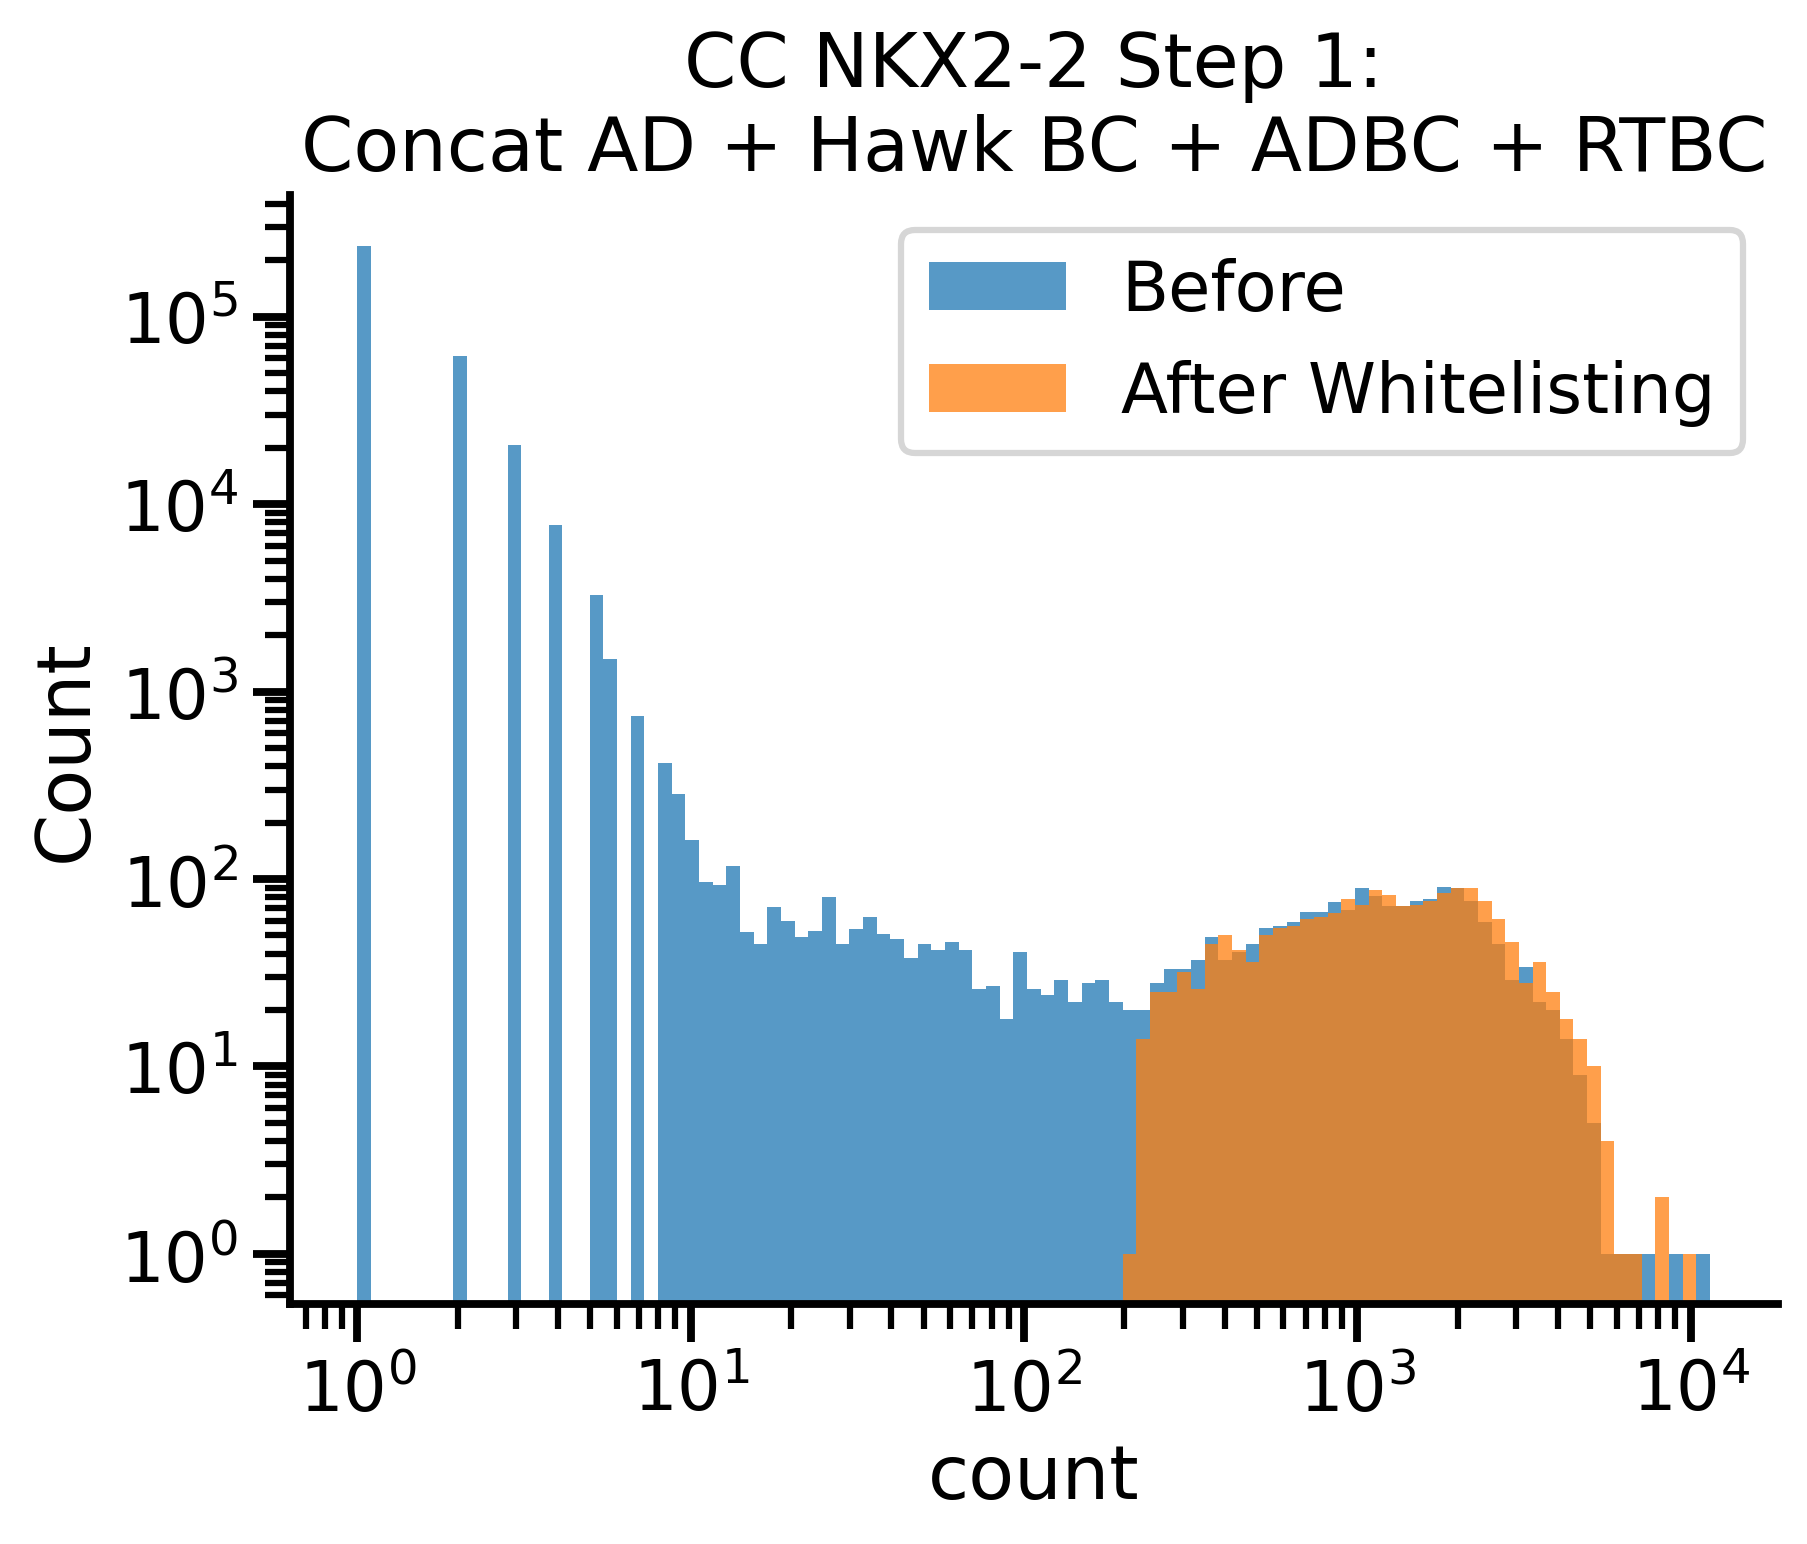

In [21]:
sns.set_context('talk')
plt.figure(dpi = 300)
ax = sns.histplot(raw_grouped["count"], log_scale=(False, True), bins = bins, label = "Before")
sns.histplot(HAR_AD_merged_fuzzy["new_total_count"], log_scale = (False, True), ax = ax, bins = bins, label = "After Whitelisting")
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("CC NKX2-2 Step 1:\nConcat AD + Hawk BC + ADBC + RTBC")
sns.despine()
#ax.set_xlim(1, None)

In [22]:
# How much do the group counts increase?

In [23]:
raw_and_corrected = pd.merge(raw_grouped, HAR_AD_merged, how = 'left')
raw_and_corrected

NameError: name 'HAR_AD_merged' is not defined

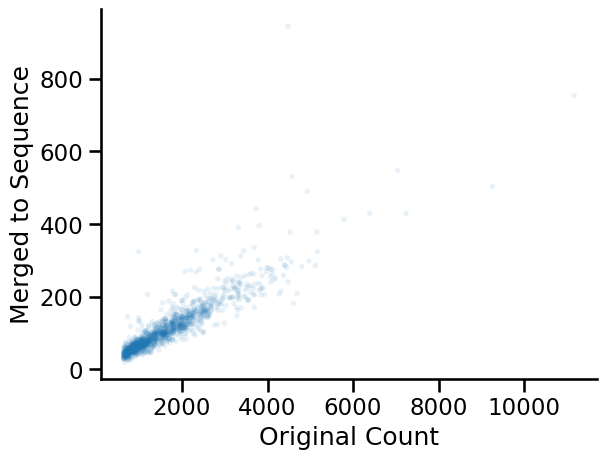

In [39]:
raw_and_corrected["count_increase"] = raw_and_corrected["new_total_count"] - raw_and_corrected["count"]
ax = sns.scatterplot(data = raw_and_corrected, x = "count", y = "count_increase", edgecolor = 'none', alpha = 0.1, s = 15)
ax.set_xlabel("Original Count")
ax.set_ylabel("Merged to Sequence")
sns.despine()

In [40]:
# Which rows are merged and which are lost?

In [41]:
HAR_AD_merged_expanded = pd.read_csv("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/data/NKX2-2_whitelist_test/HAR_AD_mismatch_flank_whitelist.txt", sep = "\t", header = None)
HAR_AD_merged_expanded[1] = HAR_AD_merged_expanded[1].str.split(",")
HAR_AD_merged_expanded[3] = HAR_AD_merged_expanded[3].str.split(",")
HAR_AD_merged_expanded = HAR_AD_merged_expanded.explode([1,3])
HAR_AD_merged_expanded = HAR_AD_merged_expanded.rename(columns = {0: "canon_read", 1: "orig_read", 2 : "canon_read_count", 3 : "orig_read_count"})
HAR_AD_merged_expanded

,canon_read,orig_read,canon_read_count,orig_read_count
0,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,AACGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3742,4
0,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,ACCGACACCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3742,1
0,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,ACCGACGACATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3742,2
0,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,ACCGACGCAATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3742,3
0,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,ACCGACGCCACCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3742,7
...,...,...,...,...
1302,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,TTCGCCGACGCCACCCATGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1523,1
1302,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,TTCGCCGACGCCAGCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1523,1
1302,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,TTCGCCGACGCCGCCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1523,1
1302,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,TTCGCCGACGCGACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1523,1


In [42]:
# Stack reads and counts
HAR_AD_merged_expanded_reads = pd.concat([
    HAR_AD_merged_expanded[['canon_read', 'canon_read_count']].rename(columns={'canon_read': 'read', 'canon_read_count': 'count'}).drop_duplicates(),
    HAR_AD_merged_expanded[['orig_read', 'orig_read_count']].rename(columns={'orig_read': 'read', 'orig_read_count': 'count'})
], ignore_index=True)

# Ensure counts are numeric
HAR_AD_merged_expanded_reads['count'] = HAR_AD_merged_expanded_reads['count'].astype(int)
HAR_AD_merged_expanded_reads

,read,count
0,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3742
1,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3936
2,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,2146
3,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,5070
4,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,4033
...,...,...
104288,TTCGCCGACGCCACCCATGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1
104289,TTCGCCGACGCCAGCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1
104290,TTCGCCGACGCCGCCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1
104291,TTCGCCGACGCGACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1


In [43]:
sum(HAR_AD_merged_expanded_reads["count"])

2404366

In [44]:
HAR_AD_merged_expanded_reads["AD"] = HAR_AD_merged_expanded_reads["read"].str[:162]
HAR_AD_merged_expanded_reads["HawkBCs"] = HAR_AD_merged_expanded_reads["read"].str[162: 162 + 9]
HAR_AD_merged_expanded_reads["ADBC2"] = HAR_AD_merged_expanded_reads["read"].str[ 162 + 9: 162 + 15]
HAR_AD_merged_expanded_reads["RTBC"] = HAR_AD_merged_expanded_reads["read"].str[ 162 + 15:]
HAR_AD_merged_expanded_reads

,read,count,AD,HawkBCs,ADBC2,RTBC
0,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3742,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,CCGTGATAC,ACGTTA,TGTGCCAATCAAGGCA
1,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3936,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,CCGTGATAC,GAAGGA,ACTATGCCAGATCTGA
2,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,2146,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,CCGTGATAC,GAATAC,ACTATGCCAGATCTGA
3,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,5070,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,CCGCAGTTA,AGTAAA,ACATATTCTTGAAGGA
4,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,4033,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,CCGCAGTTA,CCGACA,TGTATAAGTCTATGTT
...,...,...,...,...,...,...
104288,TTCGCCGACGCCACCCATGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1,TTCGCCGACGCCACCCATGCCGCCCTGCAGGCCGGCATTCCCTTCA...,AACGTCACT,TTAGAT,ATCCCATCAAAAAGAC
104289,TTCGCCGACGCCAGCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1,TTCGCCGACGCCAGCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,AACGTCACT,TTAGAT,ATCCCATCAAAAAGAC
104290,TTCGCCGACGCCGCCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1,TTCGCCGACGCCGCCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,AACGTCACT,TTAGAT,ATCCCATCAAAAAGAC
104291,TTCGCCGACGCGACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1,TTCGCCGACGCGACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,AACGTCACT,TTAGAT,ATCCCATCAAAAAGAC


In [45]:
raw_grouped_HAR_AD_merged_expanded_reads = pd.merge(raw_grouped, HAR_AD_merged_expanded_reads, how = 'left', on = ["AD", "ADBC2", "HawkBCs", "RTBC"])
raw_grouped_HAR_AD_merged_expanded_reads["whitelisted"] = ~raw_grouped_HAR_AD_merged_expanded_reads["read"].isna()
#raw_grouped_HAR_AD_merged_expanded_reads = raw_grouped_HAR_AD_merged_expanded_reads.sort_values(by = 'count', ascending= False)
raw_grouped_HAR_AD_merged_expanded_reads

,Unnamed: 0,ADBC2,HawkBCs,RTBC,AD,count_x,ADBC2_qual,HawkBCs_qual,RTBC_qual,AD_qual,Designed,read,count_y,whitelisted
0,1,CCATAA,CACCGATTG,CAGCGTTTAACAAGCG,GCCGGCGACCTGGCCGCCGCCACCTTCGGCGCCGGCATTCCCTTCA...,11172,True,True,True,True,1,GCCGGCGACCTGGCCGCCGCCACCTTCGGCGCCGGCATTCCCTTCA...,11442.0,True
1,2,GTCAGC,CCATTAACG,TGTAAAATGGGGCTGG,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCTACG...,9261,True,True,True,True,1,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCTACG...,9496.0,True
2,3,GTACAA,CCATCGGTT,TTGCAGAATAGCTGCA,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCGCCG...,7239,True,True,True,True,1,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCGCCG...,7420.0,True
3,4,TGGGAC,ACCGGATGT,CACAAAACGTGGCGCC,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,7042,True,True,True,True,1,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,7261.0,True
4,5,CTAATA,ATCAGGACC,CAGGAAATCCCTCTAT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,6387,True,True,True,True,1,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,6547.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338411,440262,AGCATT,ACTCTTGCA,AGTTACAGAATCATAA,GCCCTGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1,True,True,True,True,1,NaN,NaN,False
338412,440263,CCTAAA,AAGTCTCAC,AAAAAGTTGTAGTCCA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,1,True,True,True,True,0,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,1.0,True
338413,440264,ACATTG,ATGTTGAGG,ACCCATATAACGGCAT,GCCCAGGACCTGGCCGCCGCCGAGTTCCAGGCCGGCATTCCCTTCA...,1,True,True,True,True,0,GCCCAGGACCTGGCCGCCGCCGAGTTCCAGGCCGGCATTCCCTTCA...,1.0,True
338414,440265,CGAAGA,AGTGTAACC,TAAATCAGCGCCCAGA,GCCCAGGACTTCGCCGCCGCCGCCTTCCAGGCCGGCATTCCCTTCA...,1,True,True,True,True,0,GCCCAGGACTTCGCCGCCGCCGCCTTCCAGGCCGGCATTCCCTTCA...,1.0,True


In [46]:
raw_grouped_HAR_AD_merged_expanded_reads[raw_grouped_HAR_AD_merged_expanded_reads["count_x"] > 1000].sort_values(by = 'whitelisted')#["whitelisted"].value_counts()

,Unnamed: 0,ADBC2,HawkBCs,RTBC,AD,count_x,ADBC2_qual,HawkBCs_qual,RTBC_qual,AD_qual,Designed,read,count_y,whitelisted
0,1,CCATAA,CACCGATTG,CAGCGTTTAACAAGCG,GCCGGCGACCTGGCCGCCGCCACCTTCGGCGCCGGCATTCCCTTCA...,11172,True,True,True,True,1,GCCGGCGACCTGGCCGCCGCCACCTTCGGCGCCGGCATTCCCTTCA...,11442.0,True
625,686,AGTAAA,CATCCACTA,AGTTTAACACTTACGA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1498,True,True,True,True,1,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1545.0,True
626,687,GCTCGT,ACTCTTGCA,TTGTCAAATACTTTAA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1497,True,True,True,True,1,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1549.0,True
627,688,TCTTGA,AAGTTAGCC,ATGCCACAAACATACC,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1497,True,True,True,True,1,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1553.0,True
628,689,TTGGGA,ACAGTCCTT,CGTACAGTGGTATTAA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1492,True,True,True,True,1,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1525.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,349,CCGCTA,AGCAGACTT,CATATGTTCTGTCAAC,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATCCAGTACA...,2085,True,True,True,True,1,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATCCAGTACA...,2136.0,True
321,351,ATCAGA,CATTCGTAC,GACTTGAAACTGAATA,ACCGACTTCATCGACGAGGAGGTGTTCATGAGCTTCGTGATCGAGA...,2082,True,True,True,True,1,ACCGACTTCATCGACGAGGAGGTGTTCATGAGCTTCGTGATCGAGA...,2122.0,True
322,352,CTTGCT,AGGTCATAC,TGCATATAAAAAAATA,CAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGCCCTTCA...,2078,True,True,True,True,1,CAGTACAACGCCCAGTACAGCAGCGCCAGCACACCTCAGCCCTTCA...,2136.0,True
310,338,ATTGTA,AACCGCATA,AAGGATTAGATATTAC,GCCCAGGACCTGAGCCTGAGCACCTTCCAGGCCGGCATTCCCTTCA...,2106,True,True,True,True,1,GCCCAGGACCTGAGCCTGAGCACCTTCCAGGCCGGCATTCCCTTCA...,2177.0,True


In [47]:
min(HAR_AD_merged_expanded["canon_read_count"])

644

In [48]:
max(HAR_AD_merged_expanded["orig_read_count"])

'96'

In [49]:
HAR_AD_merged_expanded.sort_values(by = 'orig_read_count')

,canon_read,orig_read,canon_read_count,orig_read_count
664,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,GCCCAGGACCTGCCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1215,1
672,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1618,1
672,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1618,1
672,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1618,1
672,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1618,1
...,...,...,...,...
285,GCCCAGGACCTGAGCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,GCACAGGACCTGAGCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,5315,9
1222,GCCGAGGACCTGGCCGCCGCCACCTTCGAGGCCGGCATTCCCTTCA...,GCCGAGGACCTGGCCGCCGCCACCTTCGAGGCCGGCATTCCCTTCA...,2046,9
1097,GCCCAGGACCTGGCCGCCGCCCAGTTCCAGGCCGGCATTCCCTTCA...,GCCCAGGACCTGGCCGCCGCCGAGTTCCAGGCCGGCATTCCCTTCA...,2292,9
1285,TCCCAGGACCTGGCCGCCGCCACCTTCCTGGCCGGCATTCCCTTCA...,TCCAAGGACCTGGCCGCCGCCACCTTCCTGGCCGGCATTCCCTTCA...,744,90


In [50]:
raw_grouped_HAR_AD_merged_expanded_reads[["count_x", "whitelisted"]].groupby('whitelisted').sum()

,count_x
whitelisted,
False,607751
True,2307254


Text(0.5, 0, 'Concat Count')

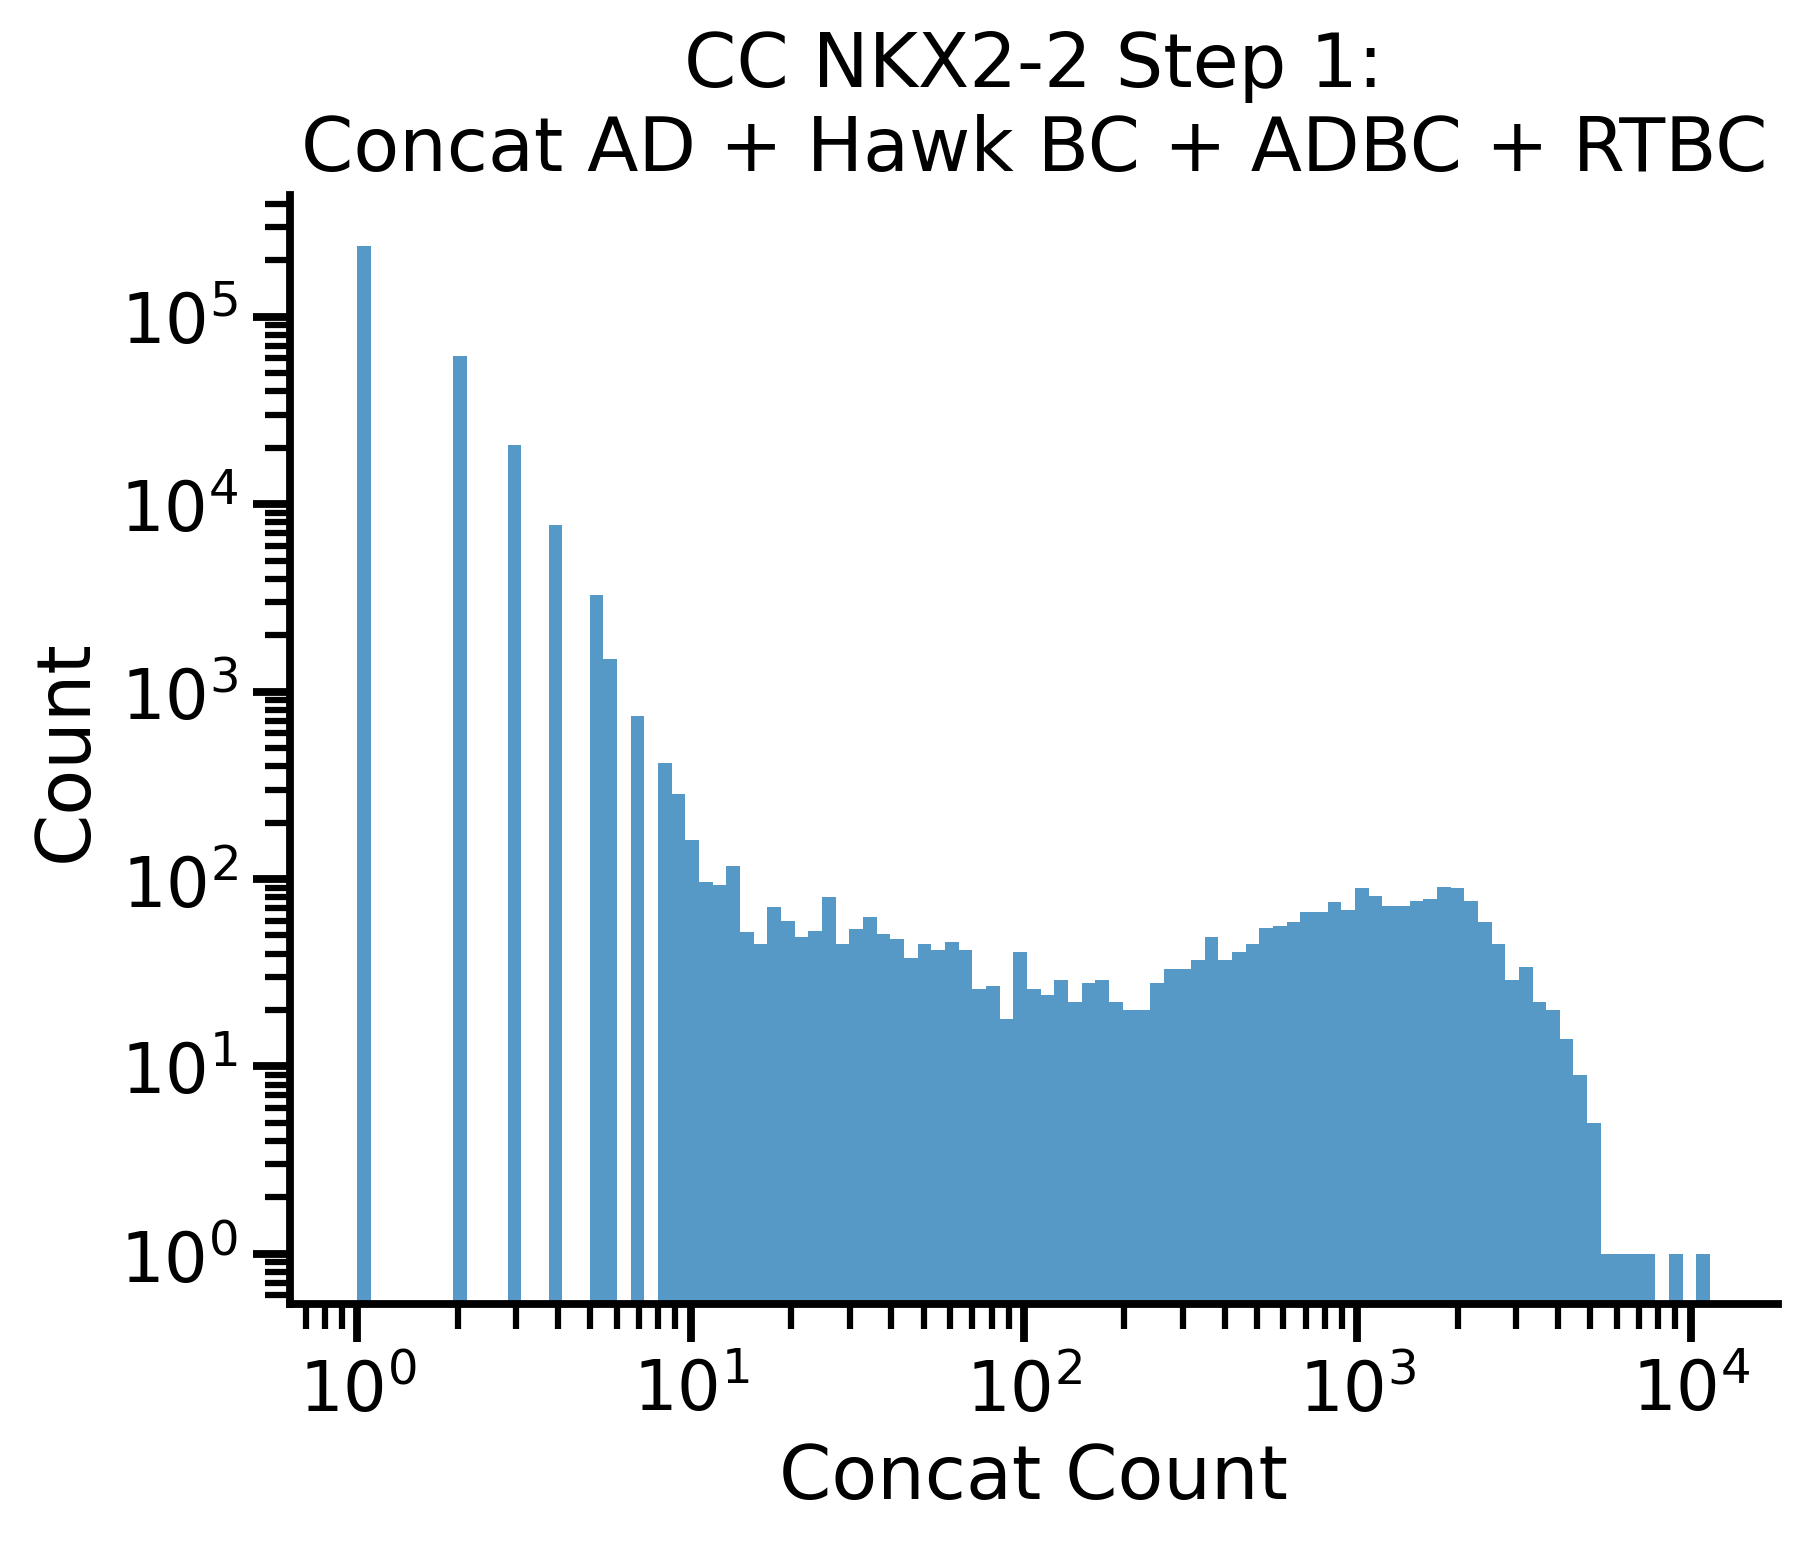

In [52]:
sns.set_context('talk')
plt.figure(dpi = 300)
ax = sns.histplot(data = raw_grouped_HAR_AD_merged_expanded_reads, x = "count_x", log_scale=(False, False), bins = bins, multiple = 'stack')
#sns.histplot(HAR_AD_merged["new_total_count"], log_scale = (False, True), ax = ax, bins = bins, label = "After Whitelisting")
#ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("CC NKX2-2 Step 1:\nConcat AD + Hawk BC + ADBC + RTBC")
sns.despine()
ax.set_xlabel("Concat Count")

#ax.set_xlim(1, None)

Text(0.5, 0, 'Concat Count')

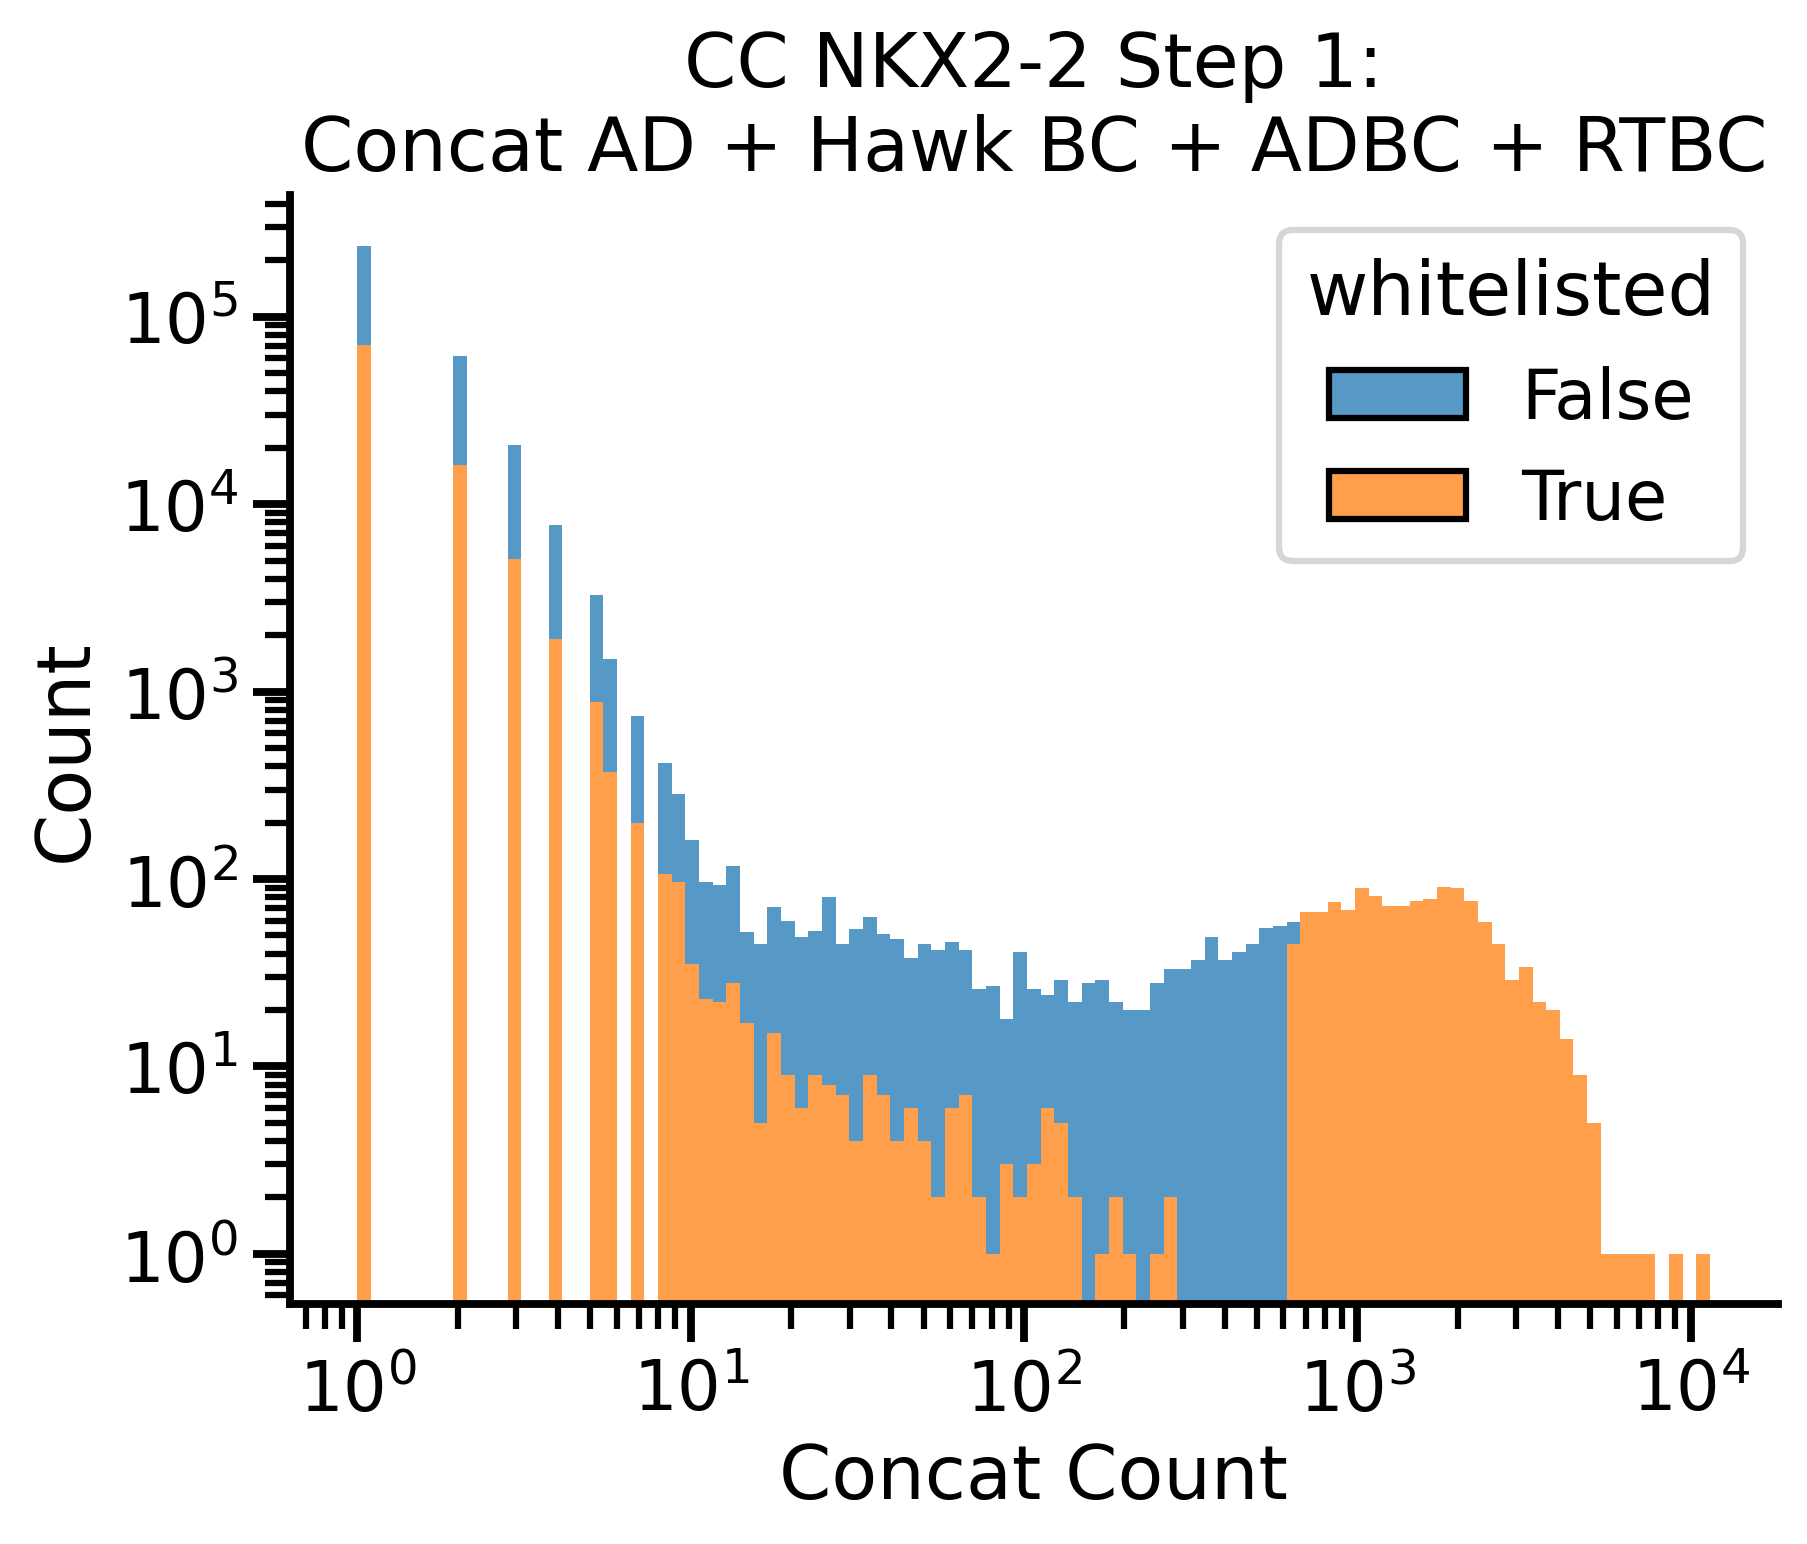

In [51]:
sns.set_context('talk')
plt.figure(dpi = 300)
ax = sns.histplot(data = raw_grouped_HAR_AD_merged_expanded_reads, x = "count_x", hue = "whitelisted", log_scale=(False, False), bins = bins, multiple = 'stack')
#sns.histplot(HAR_AD_merged["new_total_count"], log_scale = (False, True), ax = ax, bins = bins, label = "After Whitelisting")
#ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("CC NKX2-2 Step 1:\nConcat AD + Hawk BC + ADBC + RTBC")
sns.despine()
ax.set_xlabel("Concat Count")

#ax.set_xlim(1, None)

# Trying with err correction

In [ ]:
# Hawk

umi_tools whitelist \
    --stdin /global/scratch/projects/fc_mvslab/OpenProjects/Caitlin/L4/S1_czb/TL4_S1_and_gDNA_RP48hr_puro_rep1_S21.fastq.gz.assembled.fastq \
    --bc-pattern=".*(?P<discard_1>GAGCTCGCTAGC){s<=1}(?P<cell_1>.{9})(?P<discard_2>CTCGAGATAA){s<=1}(?P<umi_1>.{1}).*" \
    --extract-method=regex \
    --method=reads \
    --log=../../data/NKX2-2_whitelist_test_with_ec/Hawk_extract.log \
    --stdout=../../data/NKX2-2_whitelist_test_with_ec/Hawk_extract.txt \
    --ed-above-threshold=correct \
    --plot-prefix=../../data/NKX2-2_whitelist_test_with_ec/Hawk_plots

In [ ]:
# Hawk, ADBC2, RTBC, and AD together with mismatch oK

umi_tools whitelist \
    --stdin /global/scratch/projects/fc_mvslab/OpenProjects/Caitlin/L4/S1_czb/TL4_S1_and_gDNA_RP48hr_puro_rep1_S21.fastq.gz.assembled.fastq \
    --bc-pattern="(?P<umi_1>.{1}).*(?P<discard_1>CACCATG){s<=1}(?P<cell_0>.{162})(?P<discard_2>GGATCCGAGCTCGCTAGC){s<=1}(?P<cell_1>.{9})(?P<discard_3>CTCGAGATAACTTCGTATAATGTATGCTAT){s<=1}(?P<cell_2>.{6})(?P<discard_4>GGCCGGCCATAGGGCCCC){s<=1}(?P<cell_3>.{16})(?P<discard_5>GCGGTCCA){s<=1}" \
    --extract-method=regex \
    --method=reads \
    --log=/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/data/NKX2-2_whitelist_test_with_ec/HAR_AD_mismatch_flank_extract.log \
    --stdout=/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/data/NKX2-2_whitelist_test_with_ec/HAR_AD_mismatch_flank_whitelist.txt \
    --ed-above-threshold=correct \
    --plot-prefix=/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/data/NKX2-2_whitelist_test_with_ec/HAR_AD_plots

In [278]:
HAR_AD_merged_ec = pd.read_csv("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/data/NKX2-2_whitelist_test_with_ec/HAR_AD_mismatch_flank_whitelist.txt", sep = "\t", header = None)
HAR_AD_merged_ec["AD"] = HAR_AD_merged_ec[0].str[:162]
HAR_AD_merged_ec["HawkBCs"] = HAR_AD_merged_ec[0].str[162: 162 + 9]
HAR_AD_merged_ec["ADBC2"] = HAR_AD_merged_ec[0].str[ 162 + 9: 162 + 15]
HAR_AD_merged_ec["RTBC"] = HAR_AD_merged_ec[0].str[ 162 + 15:]
HAR_AD_merged_ec["new_total_count"] = HAR_AD_merged_ec[2] + HAR_AD_merged_ec[3].apply(lambda x: sum(map(int, x.split(','))))
HAR_AD_merged_ec

,0,1,2,3,AD,HawkBCs,ADBC2,RTBC,new_total_count
0,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,AACGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3742,"4,1,2,3,7,3,3,1,1,2,1,1,1,2,3,3,3,1,1,3,6,2,3,...",ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,CCGTGATAC,ACGTTA,TGTGCCAATCAAGGCA,3964
1,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,AACGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3936,"1,1,1,8,1,5,4,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,...",ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,CCGTGATAC,GAAGGA,ACTATGCCAGATCTGA,4168
2,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,AACGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,2146,"4,1,1,3,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,...",ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,CCGTGATAC,GAATAC,ACTATGCCAGATCTGA,2277
3,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,AACGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,5070,"2,2,1,4,4,5,3,1,1,1,1,1,1,4,1,1,2,3,1,3,3,3,1,...",ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,CCGCAGTTA,AGTAAA,ACATATTCTTGAAGGA,5367
4,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,AACGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,4033,"1,1,1,4,2,2,6,1,1,1,1,1,2,2,2,3,1,1,3,1,2,2,1,...",ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,CCGCAGTTA,CCGACA,TGTATAAGTCTATGTT,4247
...,...,...,...,...,...,...,...,...,...
1297,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,TTCCCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1576,"3,1,2,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,2,...",TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,AACGTCACT,CCGCGT,AAGAAGCTAATAGCAA,1656
1298,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,CTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1584,"2,2,1,4,1,2,2,1,1,2,2,4,1,1,1,1,1,1,1,1,1,1,1,...",TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,AACGTCACT,CGCACA,ATTAATCTTTGTTTTT,1684
1299,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,CTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1500,"2,1,3,1,2,1,6,1,1,2,1,1,2,1,1,1,3,1,1,2,1,1,1,...",TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,AACGTCACT,GCAACC,CGCTTTAATTTCGACA,1605
1300,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,TTCGACGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,698,"1,2,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,2,1,1,3,1,1,...",TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,AACGTCACT,TCTGAG,TGTATAGATGATATAC,744


In [279]:
# Not bigger than before - I think i was basically already correcting previously 
sum(HAR_AD_merged_ec["new_total_count"])

2404242

# Trying with density because seems like ends too early above in hist

In [ ]:
# Hawk, ADBC2, RTBC, and AD together with mismatch oK

umi_tools whitelist \
    --knee-method=density \
    --stdin /global/scratch/projects/fc_mvslab/OpenProjects/Caitlin/L4/S1_czb/TL4_S1_and_gDNA_RP48hr_puro_rep1_S21.fastq.gz.assembled.fastq \
    --bc-pattern="(?P<umi_1>.{1}).*(?P<discard_1>CACCATG){s<=1}(?P<cell_0>.{162})(?P<discard_2>GGATCCGAGCTCGCTAGC){s<=1}(?P<cell_1>.{9})(?P<discard_3>CTCGAGATAACTTCGTATAATGTATGCTAT){s<=1}(?P<cell_2>.{6})(?P<discard_4>GGCCGGCCATAGGGCCCC){s<=1}(?P<cell_3>.{16})(?P<discard_5>GCGGTCCA){s<=1}" \
    --extract-method=regex \
    --method=reads \
    --log=/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/data/NKX2-2_whitelist_test/HAR_AD_mismatch_flank_extract.log \
    --stdout=/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/data/NKX2-2_whitelist_test/HAR_AD_mismatch_flank_whitelist.txt \
    --plot-prefix=/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/data/NKX2-2_whitelist_test/HAR_AD_plots

In [3]:
pd.read_csv("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/data/NKX2-2_whitelist_test/HAR_AD_mismatch_flank_whitelist.txt", sep = "\t", header = None)

,0,1,2,3
0,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,AACGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3742,"4,1,2,3,7,3,3,1,1,2,1,1,1,2,3,3,3,1,1,3,6,2,3,..."
1,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,AACGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3936,"1,1,1,8,1,5,4,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,..."
2,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,AACGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,2146,"4,1,1,3,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,..."
3,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,AACGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,5070,"2,2,1,4,4,5,3,1,1,1,1,1,1,4,1,1,2,3,1,3,3,3,1,..."
4,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,AACGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,4033,"1,1,1,4,2,2,6,1,1,1,1,1,2,2,2,3,1,1,3,1,2,2,1,..."
...,...,...,...,...
1769,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,CTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1584,"2,2,1,4,1,2,2,1,1,2,2,4,1,1,1,1,1,1,1,1,1,1,1,..."
1770,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,CTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1500,"2,1,3,1,2,1,6,1,1,2,1,1,2,1,1,1,3,1,1,2,1,1,1,..."
1771,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,TTCGCCGACGCCACCCAGGACGCCCTGCAGGCCGGCATTCCCTTCA...,343,"1,1,1,1,1,1,1,1,1,1,2,1,3,1,1,2,1,1,1,2,1,1,1,2"
1772,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,TTCGACGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,698,"1,2,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,2,1,1,3,1,1,..."


In [4]:
HAR_AD_merged_expanded_density = pd.read_csv("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/data/NKX2-2_whitelist_test/HAR_AD_mismatch_flank_whitelist.txt", sep = "\t", header = None)
HAR_AD_merged_expanded_density[1] = HAR_AD_merged_expanded_density[1].str.split(",")
HAR_AD_merged_expanded_density[3] = HAR_AD_merged_expanded_density[3].str.split(",")
HAR_AD_merged_expanded_density = HAR_AD_merged_expanded_density.explode([1,3])
HAR_AD_merged_expanded_density = HAR_AD_merged_expanded_density.rename(columns = {0: "canon_read", 1: "orig_read", 2 : "canon_read_count", 3 : "orig_read_count"})
HAR_AD_merged_expanded_density

,canon_read,orig_read,canon_read_count,orig_read_count
0,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,AACGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3742,4
0,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,ACCGACACCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3742,1
0,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,ACCGACGACATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3742,2
0,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,ACCGACGCAATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3742,3
0,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,ACCGACGCCACCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3742,7
...,...,...,...,...
1773,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,TTCGCCGACGCCACCCATGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1523,1
1773,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,TTCGCCGACGCCAGCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1523,1
1773,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,TTCGCCGACGCCGCCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1523,1
1773,TTCGCCGACGCCACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,TTCGCCGACGCGACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1523,1


In [5]:
# Stack reads and counts
pt1 = HAR_AD_merged_expanded_density[['canon_read', 'canon_read_count']].rename(columns={'canon_read': 'read', 'canon_read_count': 'count'}).drop_duplicates()
pt1["group"] = "real"
pt2 = HAR_AD_merged_expanded_density[['orig_read', 'orig_read_count']].rename(columns={'orig_read': 'read', 'orig_read_count': 'count'})
pt2["group"] = "merged_error"
                                                                              
HAR_AD_merged_expanded_density_reads = pd.concat([
    pt1,
    pt2
], ignore_index=True)

# Ensure counts are numeric
HAR_AD_merged_expanded_density_reads['count'] = HAR_AD_merged_expanded_density_reads['count'].astype(int)
HAR_AD_merged_expanded_density_reads

,read,count,group
0,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3742,real
1,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3936,real
2,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,2146,real
3,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,5070,real
4,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,4033,real
...,...,...,...
115796,TTCGCCGACGCCACCCATGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1,merged_error
115797,TTCGCCGACGCCAGCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1,merged_error
115798,TTCGCCGACGCCGCCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1,merged_error
115799,TTCGCCGACGCGACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1,merged_error


In [72]:
# 2.6 mill reads (most reads saved!) of 2.9
sum(HAR_AD_merged_expanded_density_reads["count"])

2614602

In [9]:
HAR_AD_merged_expanded_density_reads["AD"] = HAR_AD_merged_expanded_density_reads["read"].str[:162]
HAR_AD_merged_expanded_density_reads["HawkBCs"] = HAR_AD_merged_expanded_density_reads["read"].str[162: 162 + 9]
HAR_AD_merged_expanded_density_reads["ADBC2"] = HAR_AD_merged_expanded_density_reads["read"].str[ 162 + 9: 162 + 15]
HAR_AD_merged_expanded_density_reads["RTBC"] = HAR_AD_merged_expanded_density_reads["read"].str[ 162 + 15:]
HAR_AD_merged_expanded_density_reads

,read,count,group,AD,HawkBCs,ADBC2,RTBC
0,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3742,real,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,CCGTGATAC,ACGTTA,TGTGCCAATCAAGGCA
1,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,3936,real,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,CCGTGATAC,GAAGGA,ACTATGCCAGATCTGA
2,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,2146,real,ACCGACGCCATCGACGAGGAGGTGGCCATGAGCGCCGTGATCGAGA...,CCGTGATAC,GAATAC,ACTATGCCAGATCTGA
3,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,5070,real,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,CCGCAGTTA,AGTAAA,ACATATTCTTGAAGGA
4,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,4033,real,ACCGACTTCATCGACGAGGAGGTGATCATGAGCATCGTGATCGAGA...,CCGCAGTTA,CCGACA,TGTATAAGTCTATGTT
...,...,...,...,...,...,...,...
115796,TTCGCCGACGCCACCCATGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1,merged_error,TTCGCCGACGCCACCCATGCCGCCCTGCAGGCCGGCATTCCCTTCA...,AACGTCACT,TTAGAT,ATCCCATCAAAAAGAC
115797,TTCGCCGACGCCAGCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1,merged_error,TTCGCCGACGCCAGCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,AACGTCACT,TTAGAT,ATCCCATCAAAAAGAC
115798,TTCGCCGACGCCGCCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1,merged_error,TTCGCCGACGCCGCCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,AACGTCACT,TTAGAT,ATCCCATCAAAAAGAC
115799,TTCGCCGACGCGACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,1,merged_error,TTCGCCGACGCGACCCAGGCCGCCCTGCAGGCCGGCATTCCCTTCA...,AACGTCACT,TTAGAT,ATCCCATCAAAAAGAC


In [28]:
raw_grouped_HAR_AD_merged_expanded_density_reads = pd.merge(raw_grouped, HAR_AD_merged_expanded_density_reads, how = 'left', on = ["AD", "ADBC2", "HawkBCs", "RTBC"], suffixes = ("_pre-merge", "_post-merge"))
#raw_grouped_HAR_AD_merged_expanded_density_reads["whitelisted"] = ~raw_grouped_HAR_AD_merged_expanded_density_reads["read"].isna()
#raw_grouped_HAR_AD_merged_expanded_reads = raw_grouped_HAR_AD_merged_expanded_reads.sort_values(by = 'count', ascending= False)
raw_grouped_HAR_AD_merged_expanded_density_reads["group"] = raw_grouped_HAR_AD_merged_expanded_density_reads["group"].fillna("discarded")
raw_grouped_HAR_AD_merged_expanded_density_reads

,Unnamed: 0,ADBC2,HawkBCs,RTBC,AD,count_pre-merge,ADBC2_qual,HawkBCs_qual,RTBC_qual,AD_qual,Designed,read,count_post-merge,group
0,1,CCATAA,CACCGATTG,CAGCGTTTAACAAGCG,GCCGGCGACCTGGCCGCCGCCACCTTCGGCGCCGGCATTCCCTTCA...,11172,True,True,True,True,1,GCCGGCGACCTGGCCGCCGCCACCTTCGGCGCCGGCATTCCCTTCA...,11442.0,real
1,2,GTCAGC,CCATTAACG,TGTAAAATGGGGCTGG,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCTACG...,9261,True,True,True,True,1,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCTACG...,9496.0,real
2,3,GTACAA,CCATCGGTT,TTGCAGAATAGCTGCA,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCGCCG...,7239,True,True,True,True,1,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCGCCG...,7420.0,real
3,4,TGGGAC,ACCGGATGT,CACAAAACGTGGCGCC,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,7042,True,True,True,True,1,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,7261.0,real
4,5,CTAATA,ATCAGGACC,CAGGAAATCCCTCTAT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,6387,True,True,True,True,1,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,6547.0,real
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338411,440262,AGCATT,ACTCTTGCA,AGTTACAGAATCATAA,GCCCTGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1,True,True,True,True,1,NaN,NaN,discarded
338412,440263,CCTAAA,AAGTCTCAC,AAAAAGTTGTAGTCCA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,1,True,True,True,True,0,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,1.0,merged_error
338413,440264,ACATTG,ATGTTGAGG,ACCCATATAACGGCAT,GCCCAGGACCTGGCCGCCGCCGAGTTCCAGGCCGGCATTCCCTTCA...,1,True,True,True,True,0,GCCCAGGACCTGGCCGCCGCCGAGTTCCAGGCCGGCATTCCCTTCA...,1.0,merged_error
338414,440265,CGAAGA,AGTGTAACC,TAAATCAGCGCCCAGA,GCCCAGGACTTCGCCGCCGCCGCCTTCCAGGCCGGCATTCCCTTCA...,1,True,True,True,True,0,GCCCAGGACTTCGCCGCCGCCGCCTTCCAGGCCGGCATTCCCTTCA...,1.0,merged_error


In [57]:
raw_grouped_HAR_AD_merged_expanded_density_reads[raw_grouped_HAR_AD_merged_expanded_density_reads["group"] == "real"].sort_values(by = "count_pre-merge")

,Unnamed: 0,ADBC2,HawkBCs,RTBC,AD,count_pre-merge,ADBC2_qual,HawkBCs_qual,RTBC_qual,AD_qual,Designed,read,count_post-merge,group
204058,262375,TCACTC,CAAGGAACA,TCCACCAACAACCCAT,GCCCAGGACCTGGCCGCCGCCGACTTCCAGGCCGGCATTCCCTTCA...,1,True,True,True,True,1,GCCCAGGACCTGGCCGCCGCCGACTTCCAGGCCGGCATTCCCTTCA...,508.0,real
209744,269838,AAACAT,AACCTCTTC,GTCACAGCGAAATTAG,GCCCAGGACCTGAGCCTGAGCACCTTCCAGGCCGGCATTCCCTTCA...,1,True,True,True,True,1,GCCCAGGACCTGAGCCTGAGCACCTTCCAGGCCGGCATTCCCTTCA...,1610.0,real
317573,412644,TACCGC,AGATGCACC,TGGTAATTCTATTCAT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1,True,True,True,True,1,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,789.0,real
53424,69445,ACATCT,ACGACTGTG,AAGAAACAAACCGAAT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,2,True,True,True,True,1,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1536.0,real
2898,4472,CGTGAA,AGTAGGTTG,AAGACTTACCAGCACG,TATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGC...,15,True,True,True,True,1,TATCCCACCGCCCATCCTCTGGTGCAGGCCCAGCAGTGGACCTGGC...,2003.0,real
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,5,CTAATA,ATCAGGACC,CAGGAAATCCCTCTAT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,6387,True,True,True,True,1,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,6547.0,real
3,4,TGGGAC,ACCGGATGT,CACAAAACGTGGCGCC,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,7042,True,True,True,True,1,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,7261.0,real
2,3,GTACAA,CCATCGGTT,TTGCAGAATAGCTGCA,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCGCCG...,7239,True,True,True,True,1,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCGCCG...,7420.0,real
1,2,GTCAGC,CCATTAACG,TGTAAAATGGGGCTGG,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCTACG...,9261,True,True,True,True,1,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCTACG...,9496.0,real


In [59]:
count_mismatch_read = raw_grouped_HAR_AD_merged_expanded_density_reads[raw_grouped_HAR_AD_merged_expanded_density_reads["group"] == "real"].sort_values(by = "count_pre-merge").iloc[0]["read"]
count_mismatch_read

'GCCCAGGACCTGGCCGCCGCCGACTTCCAGGCCGGCATTCCCTTCAGCGCCTACAGCGCCCAGAGCCTGCAGCACATGCAGTACAACGCCCAGTACAGCAGCGCCAGCGATCCTCAGTATCCCGACGCCCATCCTCTGGTGCAGGCCCAGCAGTGGGACTGGCAAGGAACATCACTCTCCACCAACAACCCAT'

In [65]:
raw_grouped["read"] = raw_grouped["AD"] + raw_grouped["HawkBCs"] + raw_grouped["ADBC2"] + raw_grouped["RTBC"]
raw_grouped

,Unnamed: 0,ADBC2,HawkBCs,RTBC,AD,count,ADBC2_qual,HawkBCs_qual,RTBC_qual,AD_qual,Designed,read
1,1,CCATAA,CACCGATTG,CAGCGTTTAACAAGCG,GCCGGCGACCTGGCCGCCGCCACCTTCGGCGCCGGCATTCCCTTCA...,11172,True,True,True,True,1,GCCGGCGACCTGGCCGCCGCCACCTTCGGCGCCGGCATTCCCTTCA...
2,2,GTCAGC,CCATTAACG,TGTAAAATGGGGCTGG,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCTACG...,9261,True,True,True,True,1,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCTACG...
3,3,GTACAA,CCATCGGTT,TTGCAGAATAGCTGCA,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCGCCG...,7239,True,True,True,True,1,GACTCTCCCGGACCCGGCTTCACACCTCACGACAGCGCTCCCGCCG...
4,4,TGGGAC,ACCGGATGT,CACAAAACGTGGCGCC,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,7042,True,True,True,True,1,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...
5,5,CTAATA,ATCAGGACC,CAGGAAATCCCTCTAT,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,6387,True,True,True,True,1,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...
...,...,...,...,...,...,...,...,...,...,...,...,...
440262,440262,AGCATT,ACTCTTGCA,AGTTACAGAATCATAA,GCCCTGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,1,True,True,True,True,1,GCCCTGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...
440263,440263,CCTAAA,AAGTCTCAC,AAAAAGTTGTAGTCCA,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...,1,True,True,True,True,0,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCG...
440264,440264,ACATTG,ATGTTGAGG,ACCCATATAACGGCAT,GCCCAGGACCTGGCCGCCGCCGAGTTCCAGGCCGGCATTCCCTTCA...,1,True,True,True,True,0,GCCCAGGACCTGGCCGCCGCCGAGTTCCAGGCCGGCATTCCCTTCA...
440265,440265,CGAAGA,AGTGTAACC,TAAATCAGCGCCCAGA,GCCCAGGACTTCGCCGCCGCCGCCTTCCAGGCCGGCATTCCCTTCA...,1,True,True,True,True,0,GCCCAGGACTTCGCCGCCGCCGCCTTCCAGGCCGGCATTCCCTTCA...


In [66]:
raw_grouped[raw_grouped["read"] == count_mismatch_read]

,Unnamed: 0,ADBC2,HawkBCs,RTBC,AD,count,ADBC2_qual,HawkBCs_qual,RTBC_qual,AD_qual,Designed,read
262375,262375,TCACTC,CAAGGAACA,TCCACCAACAACCCAT,GCCCAGGACCTGGCCGCCGCCGACTTCCAGGCCGGCATTCCCTTCA...,1,True,True,True,True,1,GCCCAGGACCTGGCCGCCGCCGACTTCCAGGCCGGCATTCCCTTCA...


In [67]:
HAR_AD_merged_expanded_density[HAR_AD_merged_expanded_density["canon_read"] == count_mismatch_read]["canon_read"].iloc[0]

'GCCCAGGACCTGGCCGCCGCCGACTTCCAGGCCGGCATTCCCTTCAGCGCCTACAGCGCCCAGAGCCTGCAGCACATGCAGTACAACGCCCAGTACAGCAGCGCCAGCGATCCTCAGTATCCCGACGCCCATCCTCTGGTGCAGGCCCAGCAGTGGGACTGGCAAGGAACATCACTCTCCACCAACAACCCAT'

In [68]:
raw_grouped[raw_grouped["read"] == "GCCCAGGACCTGGCCGCCGCCGACTTCCAGGCCGGCATTCCCTTCAGCGCCTACAGCGCCCAGAGCCTGCAGCACATGCAGTACAACGCCCAGTACAGCAGCGCCAGCGATCCTCAGTATCCCGACGCCCATCCTCTGGTGCAGGCCCAGCAGTGGGACTGGCAAGGAACATCACTCTCCACCAACAACCCAT"]

,Unnamed: 0,ADBC2,HawkBCs,RTBC,AD,count,ADBC2_qual,HawkBCs_qual,RTBC_qual,AD_qual,Designed,read
262375,262375,TCACTC,CAAGGAACA,TCCACCAACAACCCAT,GCCCAGGACCTGGCCGCCGCCGACTTCCAGGCCGGCATTCCCTTCA...,1,True,True,True,True,1,GCCCAGGACCTGGCCGCCGCCGACTTCCAGGCCGGCATTCCCTTCA...


In [24]:
palette = sns.color_palette('colorblind')
palette

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

Text(0.5, 0, 'Concat Count')

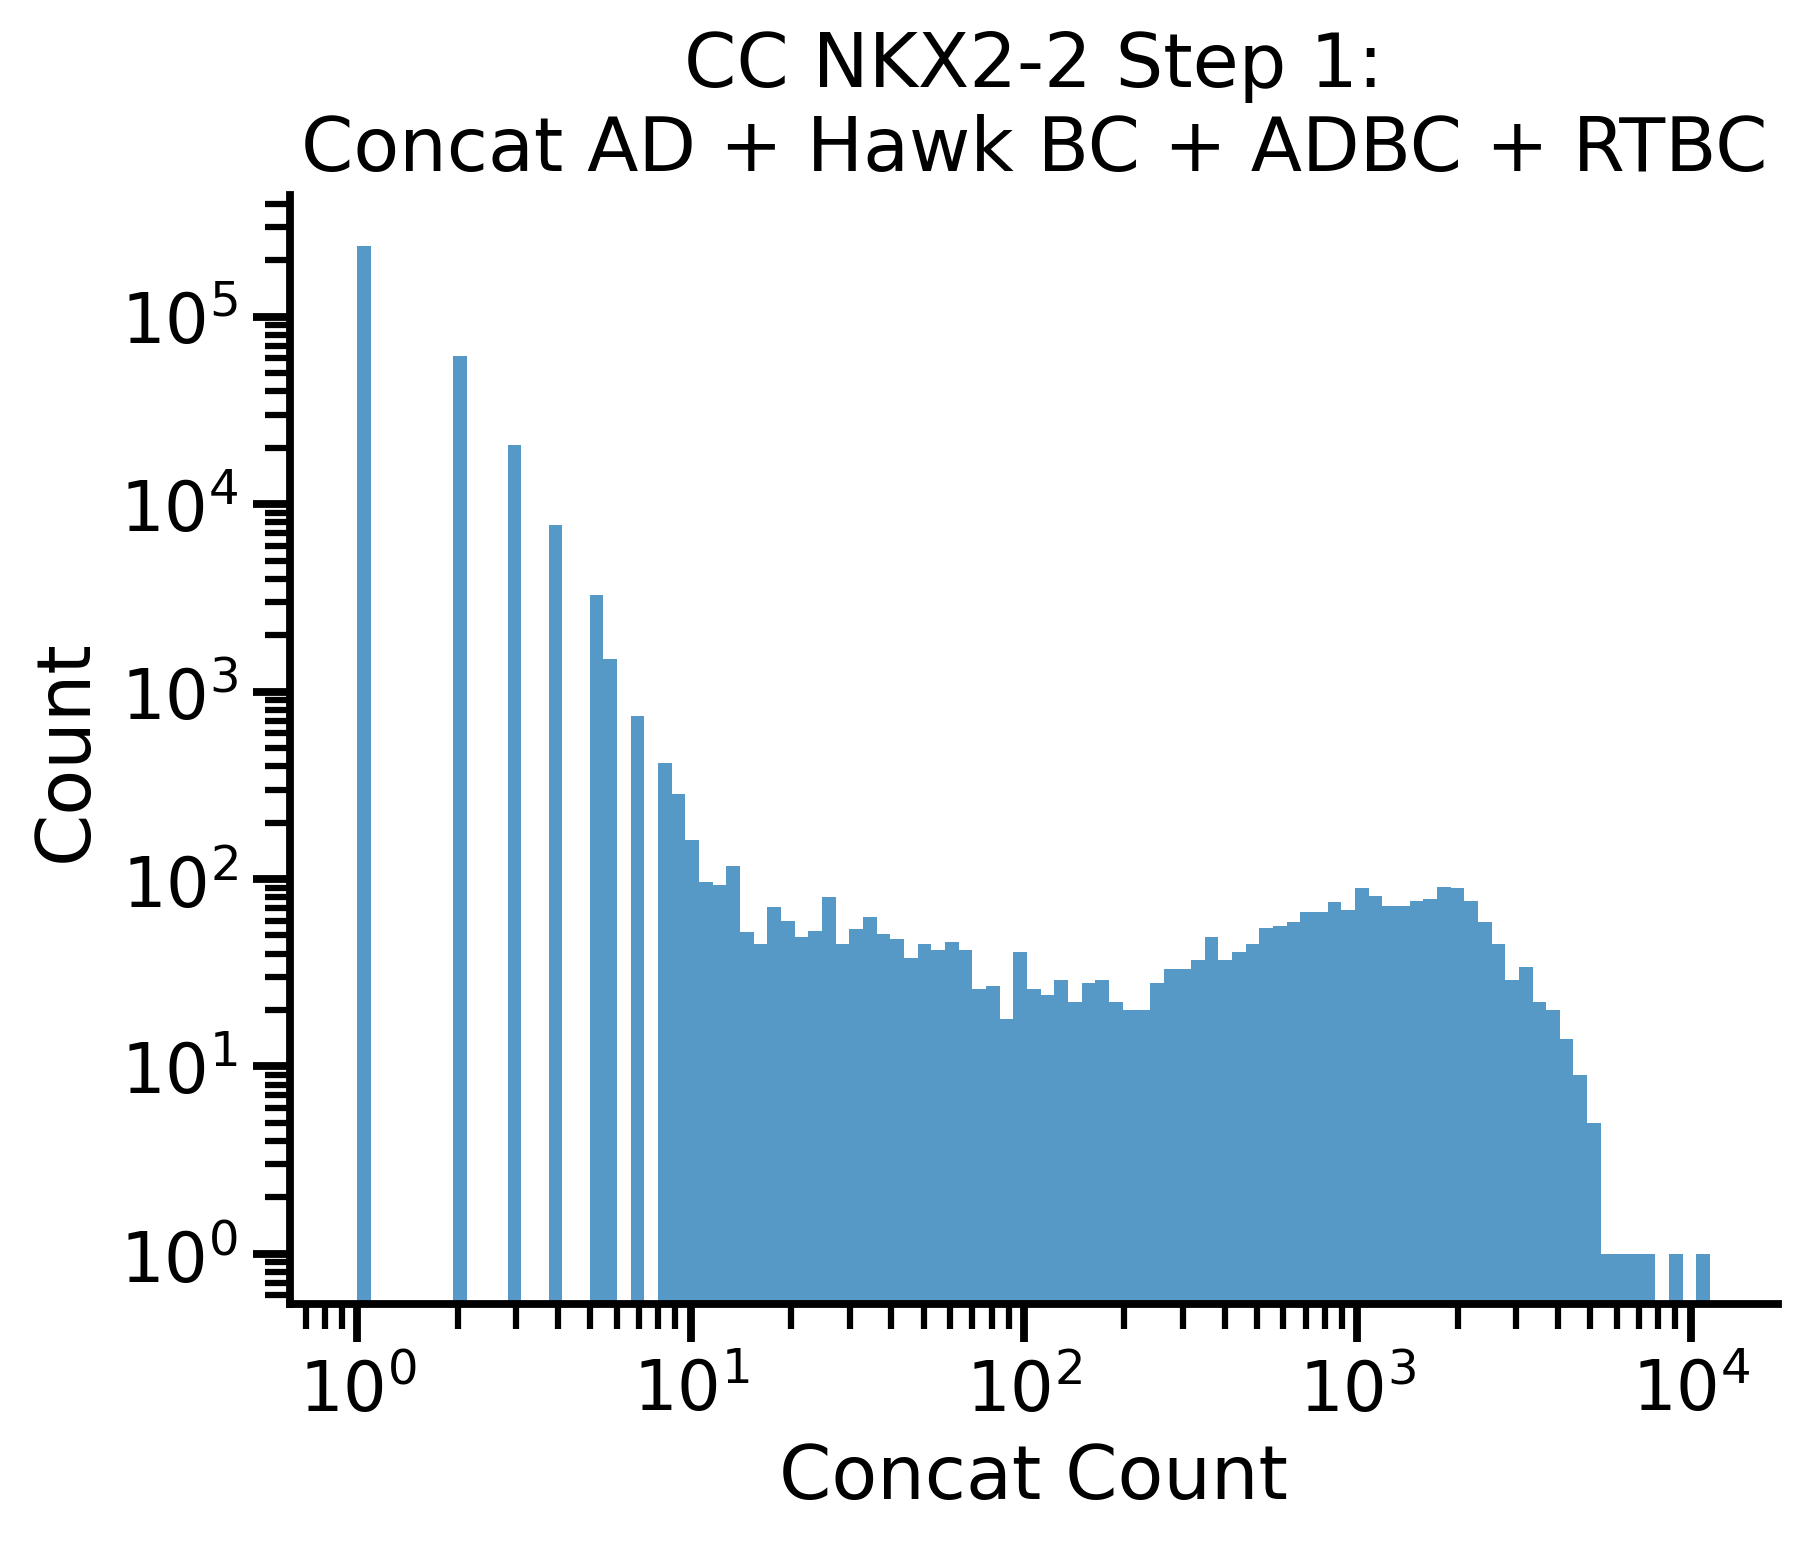

In [29]:
sns.set_context('talk')
plt.figure(dpi = 300)
ax = sns.histplot(data = raw_grouped_HAR_AD_merged_expanded_density_reads, 
                  x = "count_pre-merge", 
                  log_scale=(False, False), 
                  bins = bins, 
                  multiple = 'stack',
                 palette = {"real" : palette[3], "discarded" : palette[1], "merged_error" : palette[2]})
#sns.histplot(HAR_AD_merged["new_total_count"], log_scale = (False, True), ax = ax, bins = bins, label = "After Whitelisting")
#ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("CC NKX2-2 Step 1:\nConcat AD + Hawk BC + ADBC + RTBC")
sns.despine()
ax.set_xlabel("Concat Count")

#ax.set_xlim(1, None)

Text(0.5, 0, 'Concat Count')

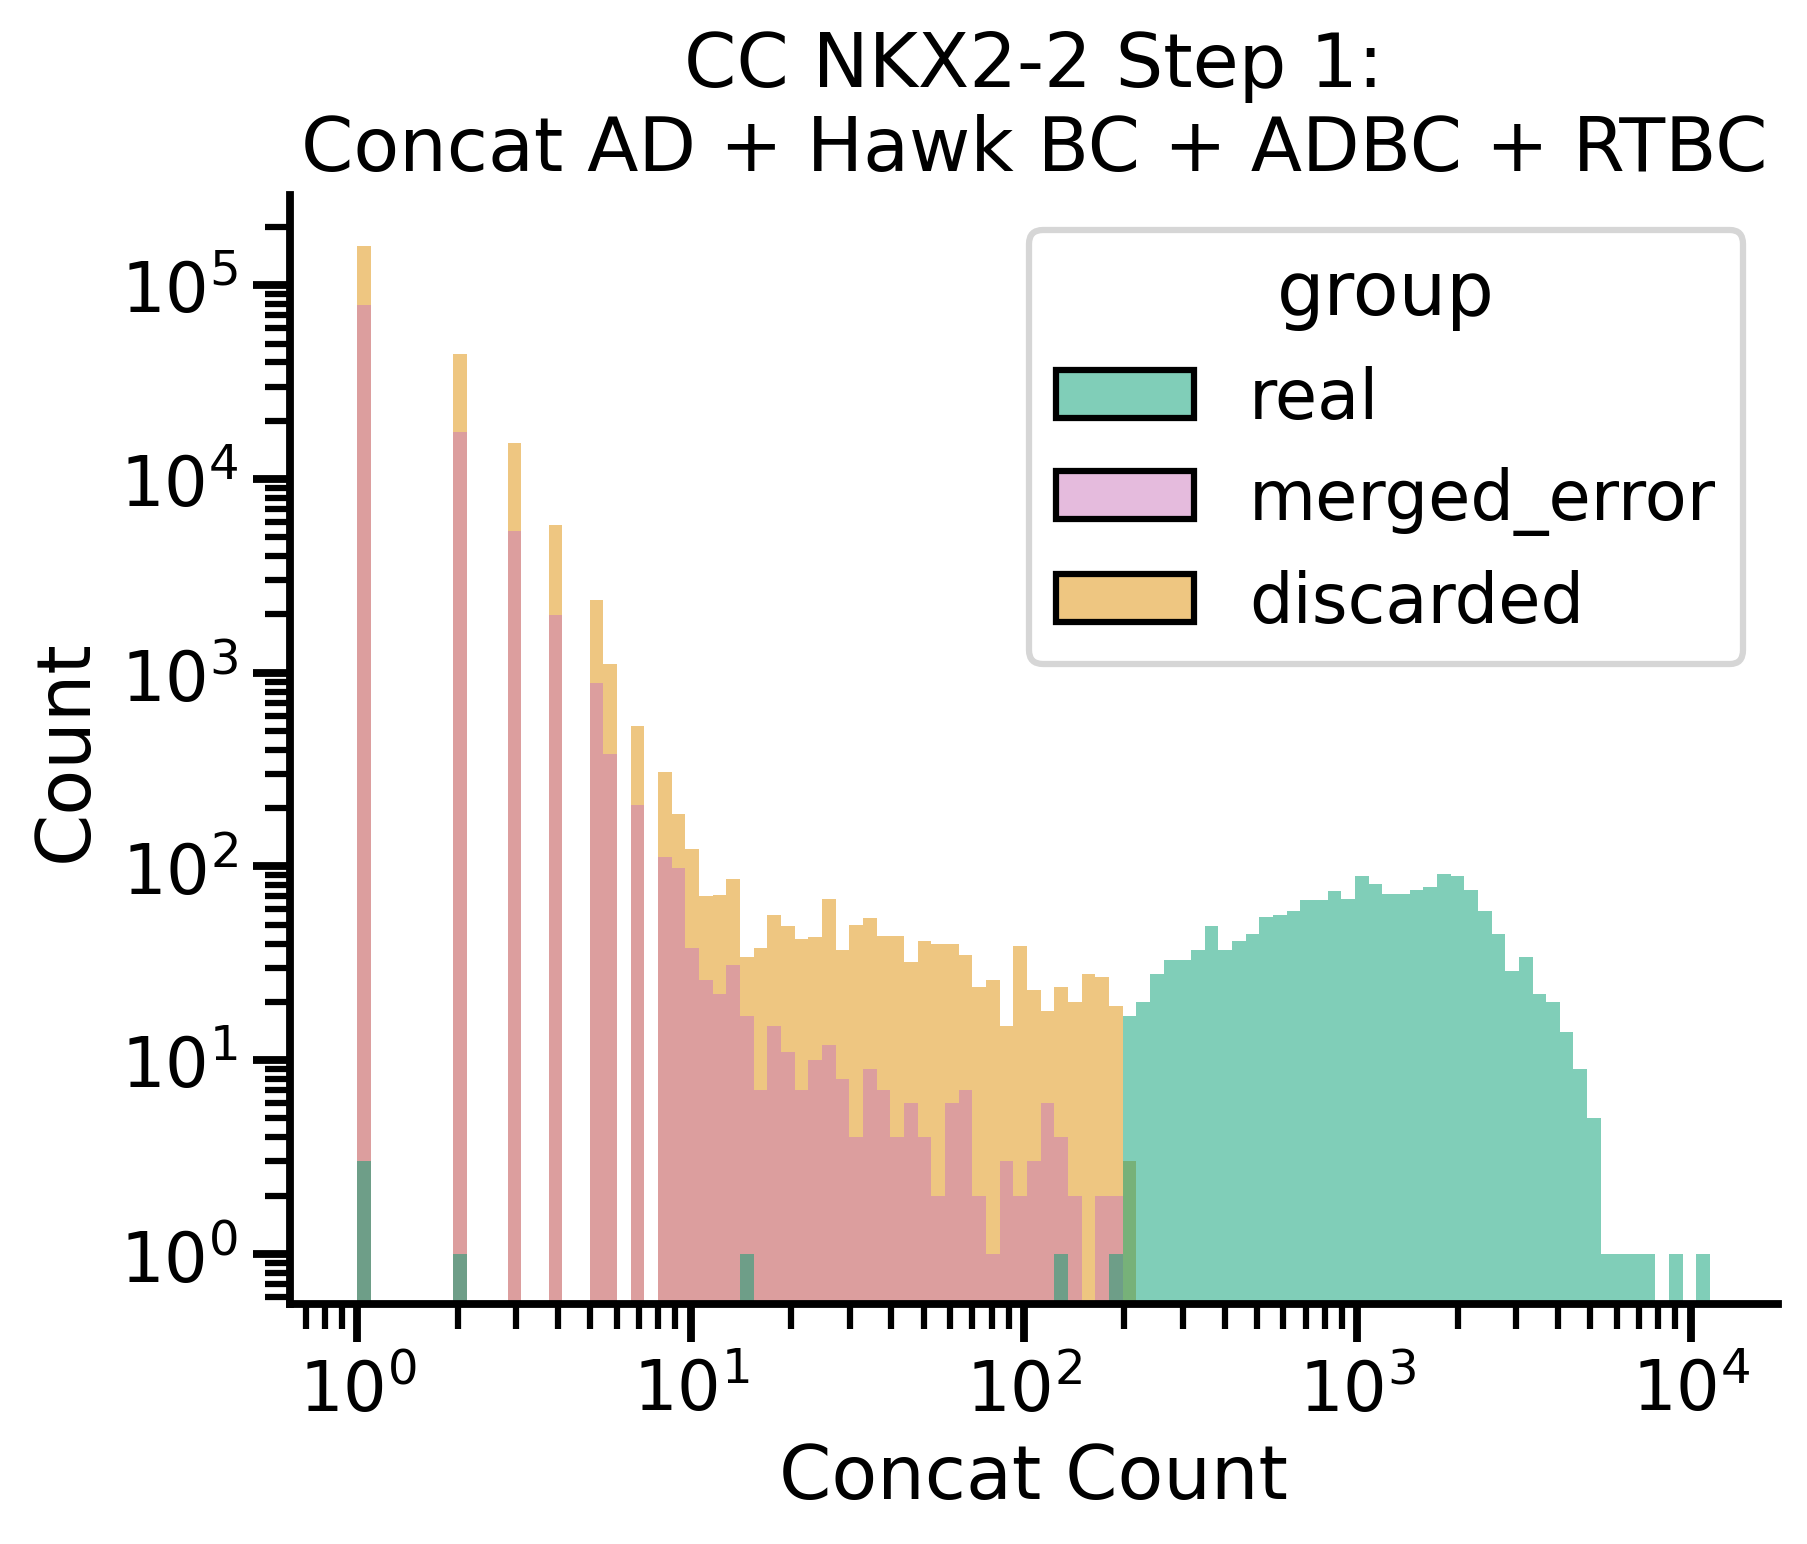

In [30]:
sns.set_context('talk')
plt.figure(dpi = 300)
ax = sns.histplot(data = raw_grouped_HAR_AD_merged_expanded_density_reads, 
                  x = "count_pre-merge", 
                  hue = "group",
                  log_scale=(False, False), 
                  bins = bins, 
                hue_order=["real", "merged_error", "discarded"],  
                 palette = {"real" : palette[2], "discarded" : palette[1], "merged_error" : palette[4]})
#sns.histplot(HAR_AD_merged["new_total_count"], log_scale = (False, True), ax = ax, bins = bins, label = "After Whitelisting")
#ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("CC NKX2-2 Step 1:\nConcat AD + Hawk BC + ADBC + RTBC")
sns.despine()
ax.set_xlabel("Concat Count")

#ax.set_xlim(1, None)